# **Importing the necessary libraries**

In [57]:
# Imorting the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import  filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,LeaveOneOut,KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score
from sklearn.metrics import  f1_score,precision_recall_curve,cohen_kappa_score,auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import  XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = None
pd.options.display.precision = 3
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Dataset Description

| Column Name             | Description                                                  |
|-------------------------|--------------------------------------------------------------|
| `student_id`            | Unique identifier                                            |
| `age`                   | Age of the student                                           |
| `gender`                | Male / Female / Other                                        |
| `course_type`           | Digital Marketing / Python / UI/UX                          |
| `session_count`         | Total number of sessions attended                            |
| `avg_session_duration`  | Average time (in minutes) spent per session                  |
| `quiz_attempts`         | Number of quiz attempts made                                 |
| `assignments_submitted` | Number of assignments submitted                              |
| `satisfaction_rating`   | 1 to 5 scale rating from course feedback                     |
| `dropout`               | Target variable – 1 = Dropped Out, 0 = Completed             |



# **Read the Dataset**

In [58]:
# Reading the dataset using pandas library
learning_data = pd.read_excel('learning_data.xlsx')

# **Print first five rows**

In [59]:
learning_data.head()

,student_id,age,gender,course_type,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
0,S0001,24,Male,UI/UX,11,108.13,7,5,5,0
1,S0002,37,Male,Python,9,59.51,3,1,1,1
2,S0003,32,Male,UI/UX,15,81.77,3,3,1,1
3,S0004,28,Female,Digital Marketing,7,24.82,4,4,1,1
4,S0005,25,Female,Digital Marketing,5,27.11,7,1,4,1


# **Shape of the data**

In [60]:
print(f'No of rows: {learning_data.shape[0]}')
print(f'No of columns: {learning_data.shape[1]}')

No of rows: 200
No of columns: 10


# **Checking data types of columns**

In [61]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             200 non-null    object 
 1   age                    200 non-null    int64  
 2   gender                 200 non-null    object 
 3   course_type            200 non-null    object 
 4   session_count          200 non-null    int64  
 5   avg_session_duration   200 non-null    float64
 6   quiz_attempts          200 non-null    int64  
 7   assignments_submitted  200 non-null    int64  
 8   satisfaction_rating    200 non-null    int64  
 9   dropout                200 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


**Inference:** 
* Only gender and course_type columns are categorical. The rest are numerical.

# **Making student id as index as it is a redundant column**

In [62]:
learning_data.set_index('student_id', inplace=True)

# **Description of the data**

In [63]:
learning_data.describe()

,age,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,27.850,14.415,59.160,4.320,2.380,3.090,0.485
std,6.422,8.899,31.797,2.865,1.721,1.411,0.501
min,18.000,0.000,7.310,0.000,0.000,1.000,0.000
25%,22.000,6.750,30.850,2.000,1.000,2.000,0.000
50%,27.500,15.000,58.160,4.000,2.000,3.000,0.000
75%,33.000,22.000,87.230,7.000,4.000,4.000,1.000
max,39.000,29.000,118.850,9.000,5.000,5.000,1.000


**Inference -**
As we can see from the following description that:
* Max age of a learner is 39 years old and minimum age is 18 years old.
* The average age of learners is 27.85 years old.
* The aveage maximum duration of session is 118.85.
* Max session count is 29.
* Maximum quiz attempts are 9 and minimum is 0.

In [64]:
# Describing the categorical data
learning_data.describe(include=object)

,gender,course_type
count,200,200
unique,3,3
top,Male,Digital Marketing
freq,94,83


**Inference -**
as we can the description of category columns that:
* Maximum number of learners are `male`.
* Maximum number of learners enrolled in `Digital Marketing` course.

# **Data Cleaning and Preprocessing**

#### **Checking for missing values**

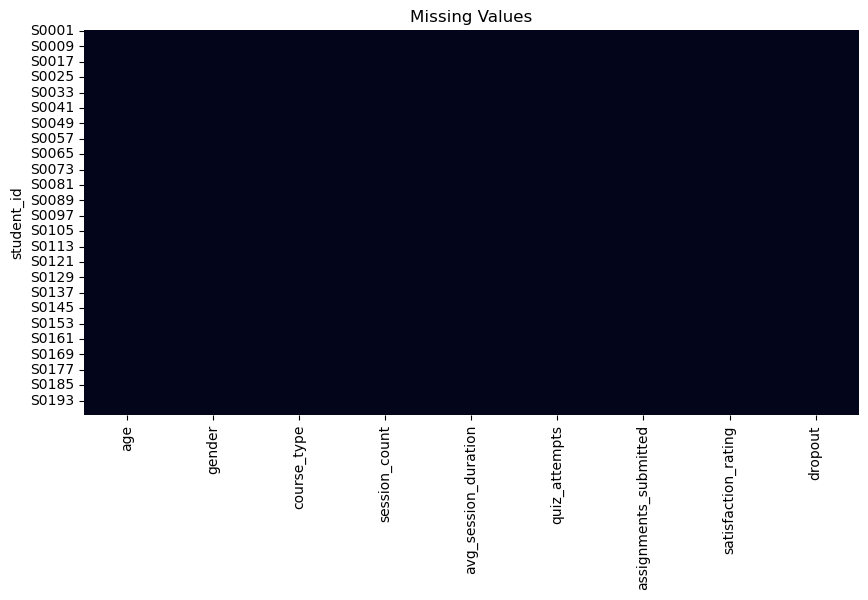

In [65]:
# If there are any missing value we will see white lines in the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(learning_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

In [66]:
# isnull().sum() will return the number of null values in each column
learning_data.isnull().sum()

age                      0
gender                   0
course_type              0
session_count            0
avg_session_duration     0
quiz_attempts            0
assignments_submitted    0
satisfaction_rating      0
dropout                  0
dtype: int64

**Inference:** 
* There are no missing values in the dataset.

#### **Checking for duplicates**

In [67]:
learning_data[learning_data.duplicated()]

,age,gender,course_type,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
student_id,,,,,,,,,


**Inference:** 
* There are no duplicates in the dataset.

#### **Checking for outliers**

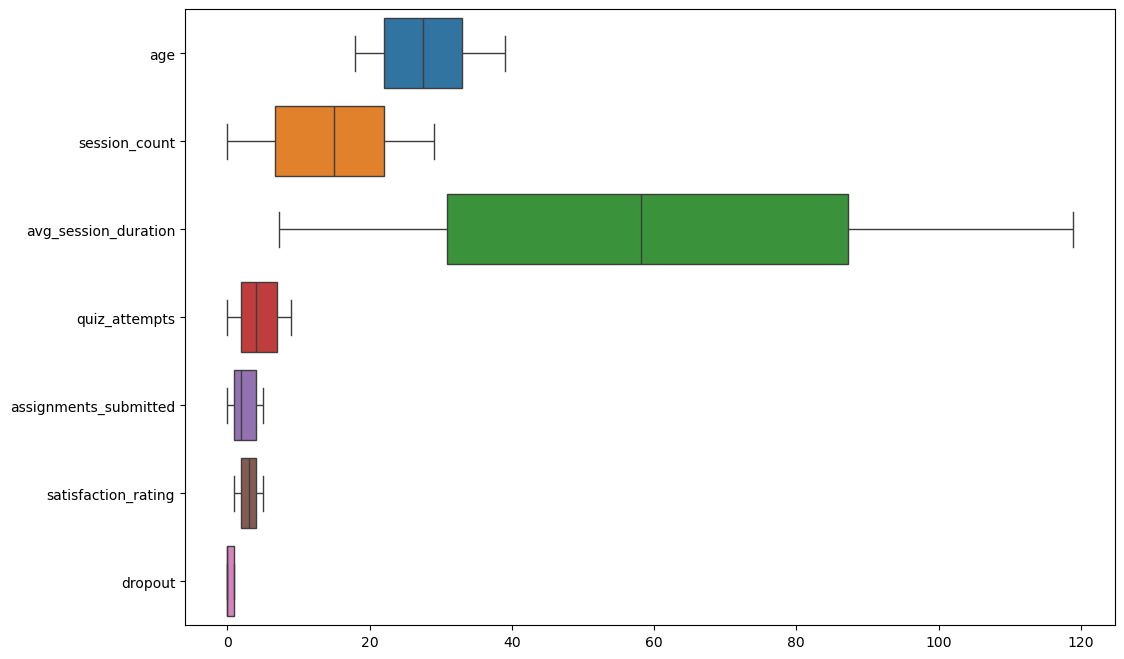

In [68]:
# Boxplot for the numerical data
# If there are any outliers in the data, they would be represented as points outside the whiskers of the boxplot.
plt.figure(figsize=(12,8))
sns.boxplot(data=learning_data,orient='h')
plt.show()

**Inference:** 
* There are no outliers in the dataset.

# **Data Visualization**

#### **Univariate Analysis**

**Categorical variable**

In [69]:
cat_cols = learning_data.select_dtypes(include='object')

**Pie Chart**

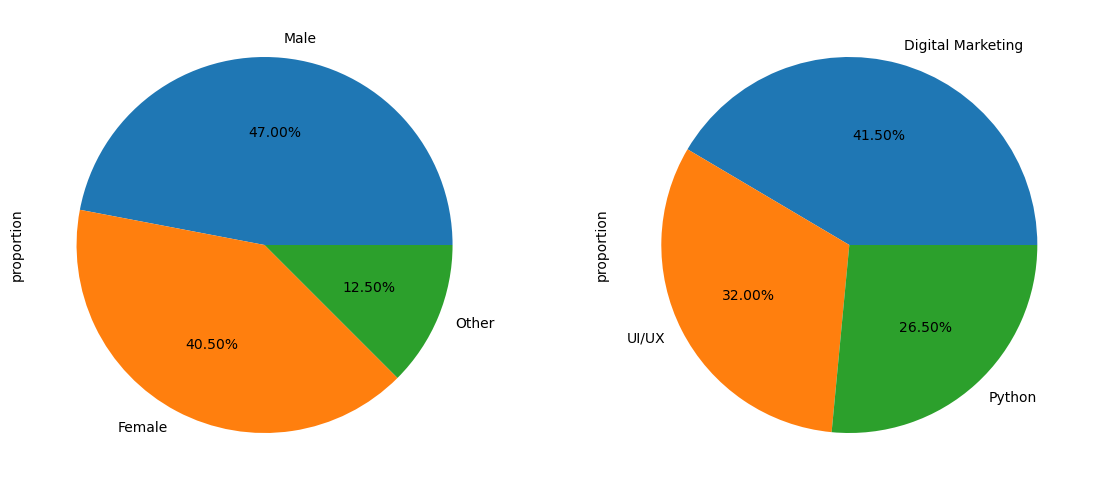

In [70]:
t = 1
for i in cat_cols:
    plt.subplot(1,2,t)
    learning_data[i].value_counts(normalize=True).plot(kind='pie', figsize=(12, 5),autopct='%.2f%%')
    t=t+1
plt.tight_layout()
plt.show()

**Inference:** 
* Maximum number of learner are `male` i.e `47%` and 40.5% female and rest others.

* Most of the learner enrolled in `Digital Marketing course` i.e `41.5%` and 32% in UI/UX and rest in Python.

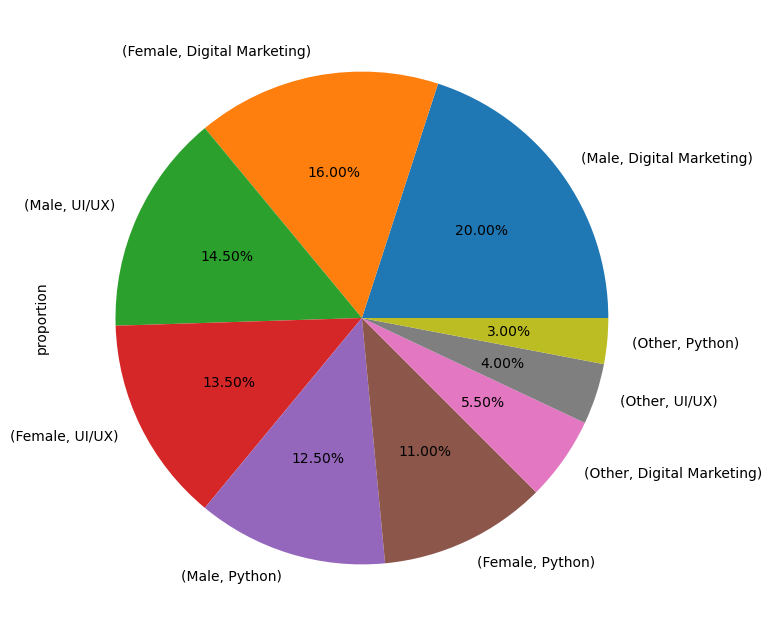

In [71]:
cat_cols.value_counts(normalize=True).plot(kind='pie', figsize=(15, 8),autopct='%.2f%%')
plt.show()

**Inference:**
* `Male - Digital Marketing` holds the largest share at 20%, followed by `Female - Digital Marketing` at 16%.

* `UI/UX` course has a relatively balanced participation from both genders `(Male: 14.5%, Female: 13.5%)`.

* `Python` course has lower overall representation, with `Male (12.5%) and Female (11%)`.

* Students identifying as `"Other" gender` make up a smaller portion, with their highest representation in `Digital Marketing (5.5%)`.

* The least represented group is `Other, Python with just 3%`.

**Countplot**

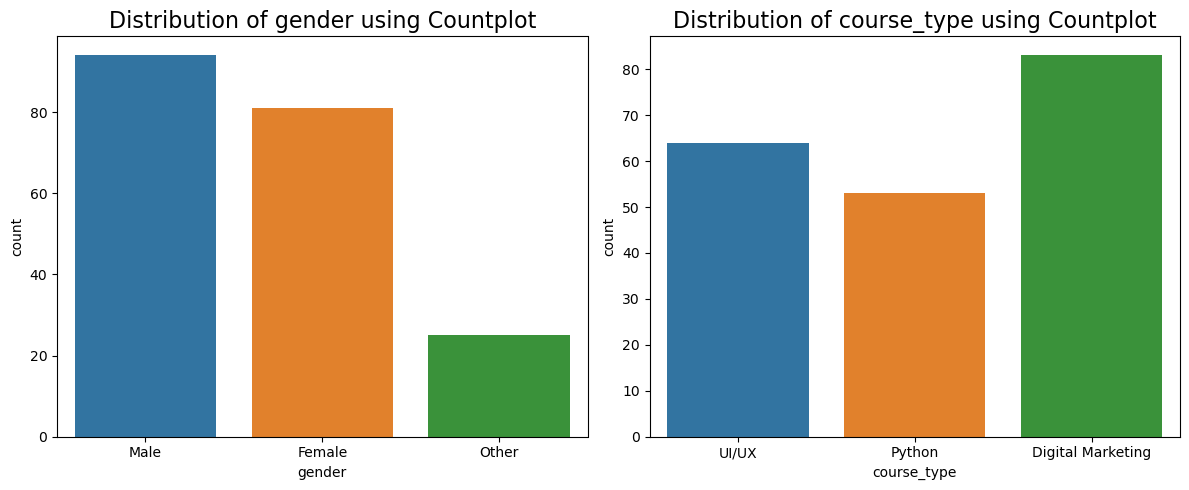

In [72]:
t = 1
plt.figure(figsize=(12, 5))
for i in cat_cols:
    plt.subplot(1,2,t)
    sns.countplot(data=learning_data,x = i,hue=i)
    plt.title(f'Distribution of {i} using Countplot', fontsize = 16)
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**
* `80+` learners are `male`, `~80` learners are `female` and `~30` are `other gender` learners.

* `80+` learners enrolled in `Digital Marketing` course, `~65` learners enrolled in `UI/UX` course and `~50` learners enrolled in `Python` course.

**Numerical variables**

In [73]:
num_cols = learning_data.select_dtypes(include=np.number)

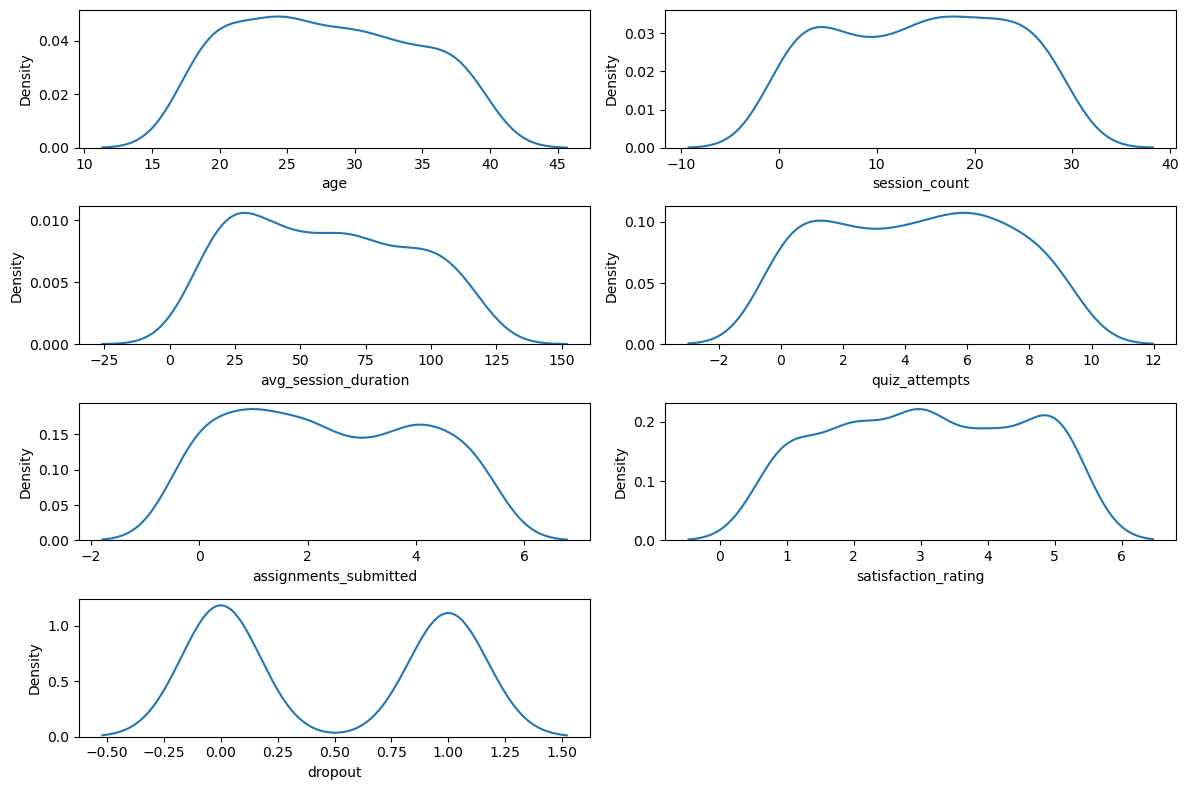

In [74]:
t=1
plt.figure(figsize=(12, 8))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data=learning_data,x=i)
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**
* `Age` is `most concentrated between 18 to 35 years`, indicating the typical student demographic.

* Session Count, Quiz Attempts, and Assignments Submitted are bimodal, possibly indicating two distinct engagement groups: low vs high participation.

* `Average Session` Duration `peaks around 40 to 80 minutes`, suggesting common attention spans.

* `Satisfaction Rating` is `relatively uniform between 2 to 5`, with slight dips at extremes—most students rated moderately.

* `Dropout` shows a clear `bimodal distribution`, indicating a `near-equal split between students who completed vs dropped out`.


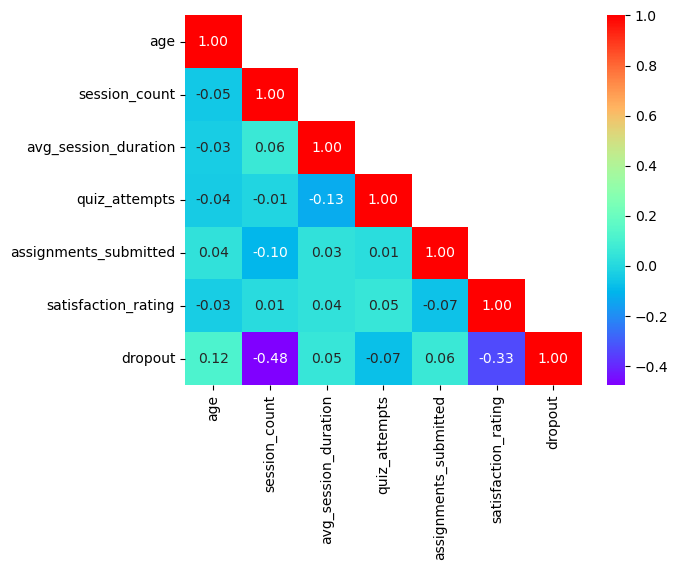

In [75]:
sns.heatmap(num_cols.corr(), annot=True,cmap='rainbow', fmt='.2f',mask=np.triu(num_cols.corr(),k=1))
plt.show()

**Inference:** 
* `Session_count` and `satisfaction_rating` have a slightly neagtive correlation with `target variable dropout` indicating that as the session count and satisfaction rating increase, the dropout rate decreases. However, the correlation is weak

* Other features does not have any neither positive nor negative correlation with `target variable dropout` indicating that they do not have any significant impact on the `target variable dropout`.

#### **Bivariate Analysis**

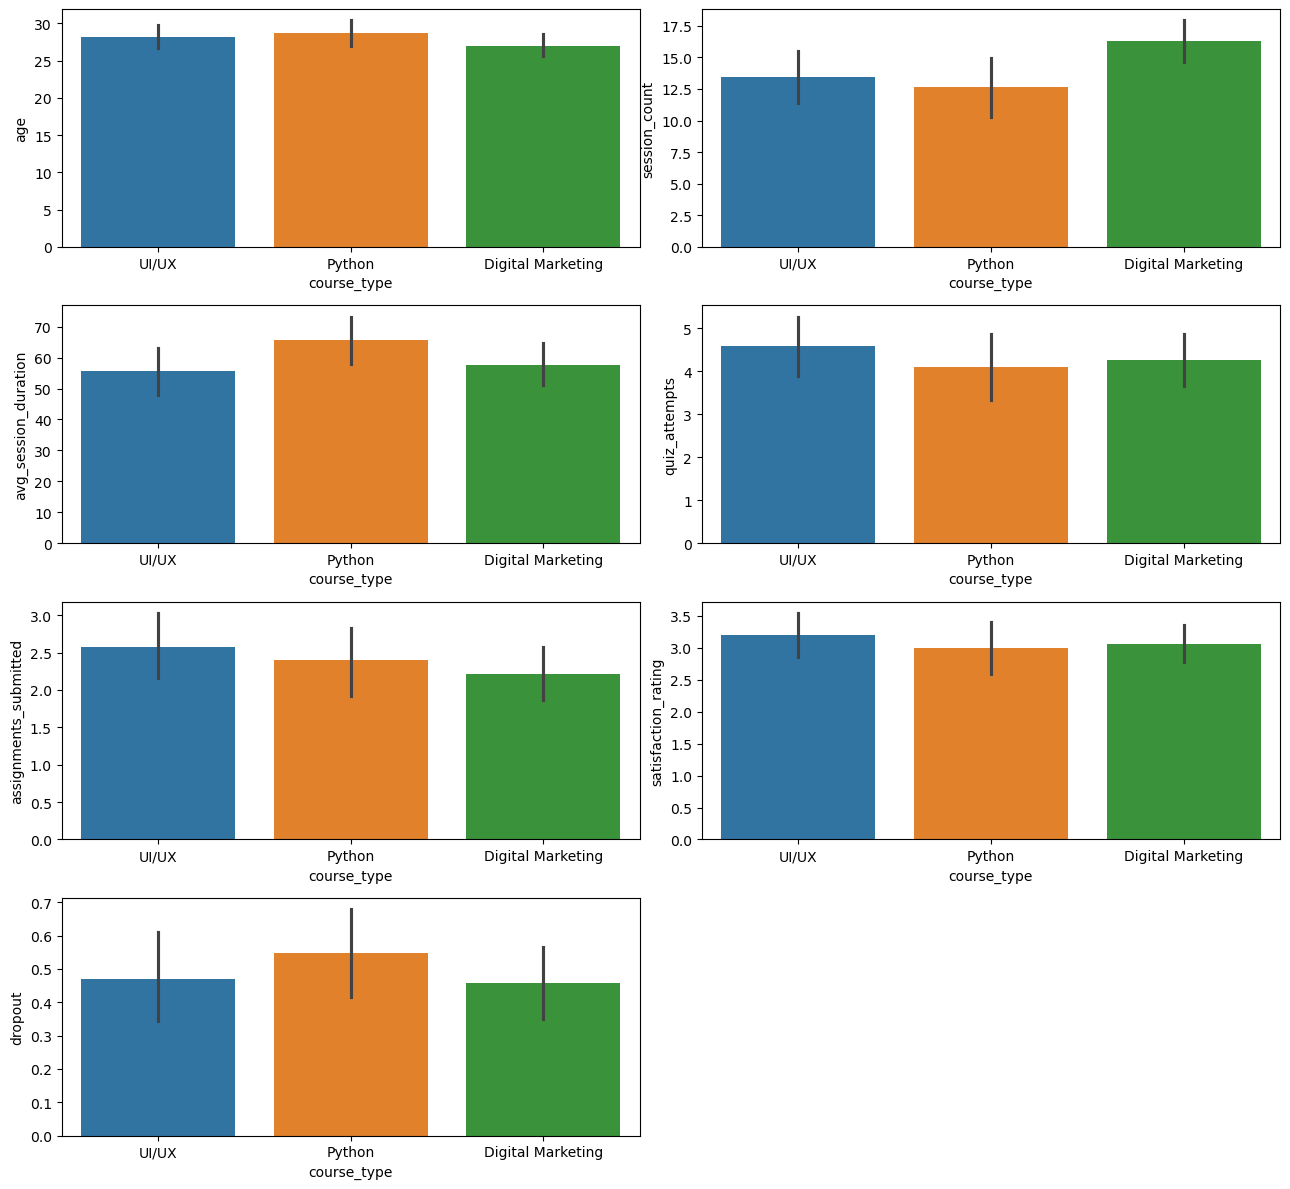

In [76]:
t = 1
plt.figure(figsize=(13, 12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.barplot(data=learning_data,x=learning_data['course_type'],y=i,hue=learning_data['course_type'])
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**
* As we can see age of learners is `~25` around all the courses.

* `Maximum` session count was done in `Digital marketing` course with `~17` sessions and `minimum` with `Python` course with `~12` sessions.

* `Average session duration` of `Python` course was `maximum` and `Digital Marketing and UI/UX` course was `approximately same`.

* `Maximum` quiz attempts were done for `UI/UX` course with `~4`.

* Maximum `assignment submission` and `satisfaction rating` was done in `UI/UX` course.

* Maximum `dropout` were in `Python` course `followed` by UI/UX and Digital Marketing course.

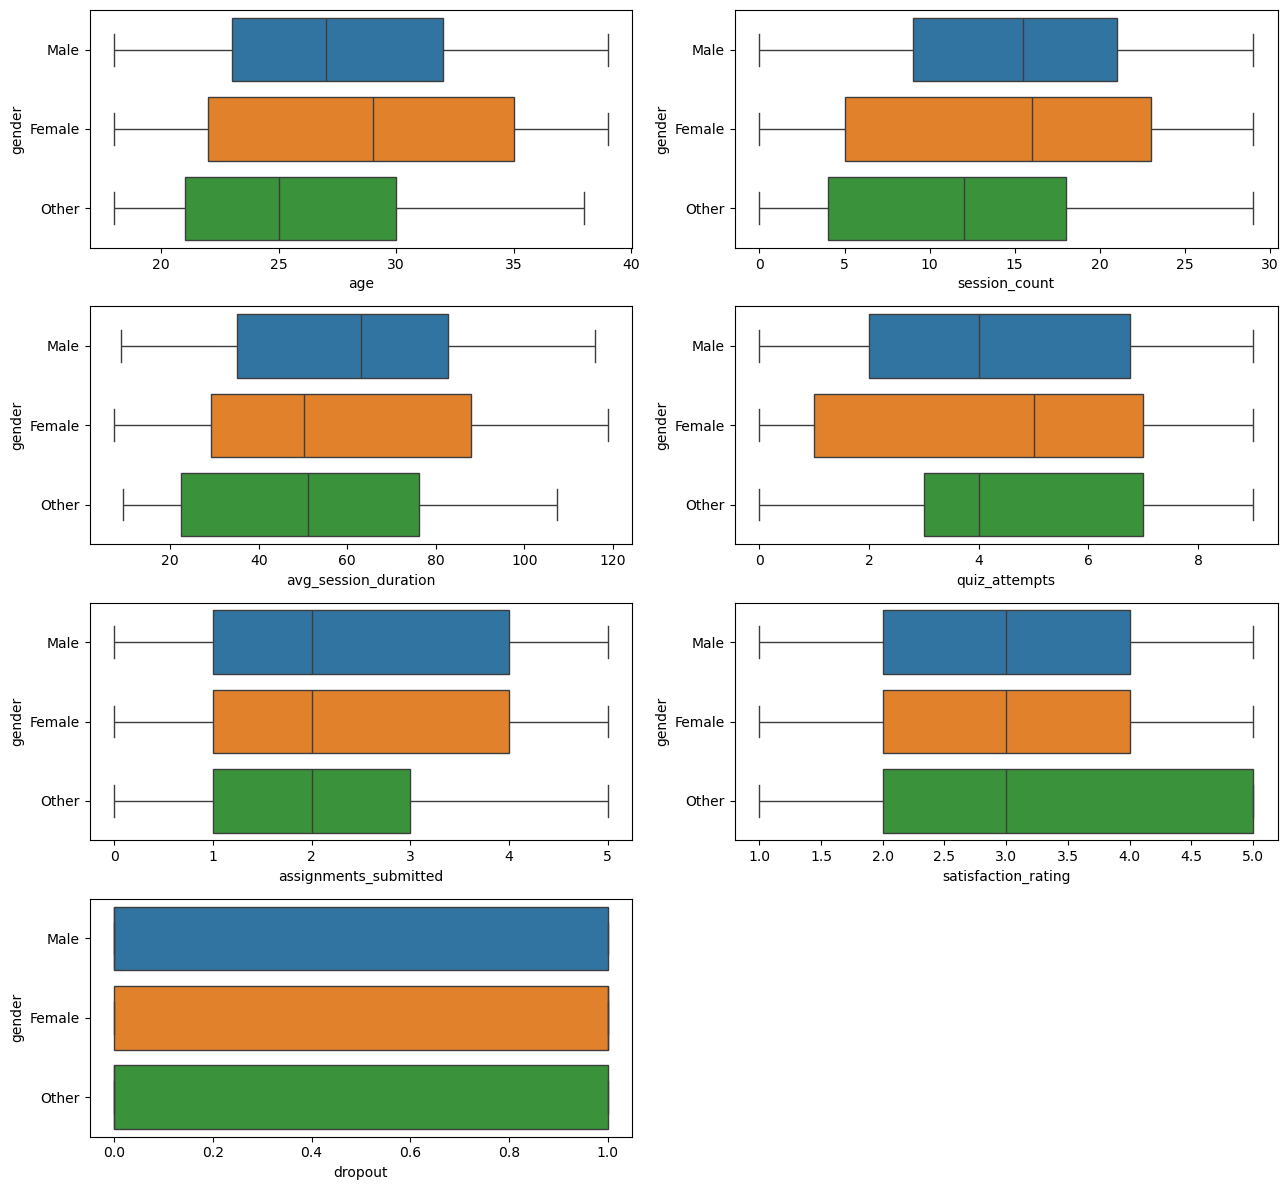

In [77]:
t = 1
plt.figure(figsize=(13, 12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=learning_data,x=i,y=learning_data['gender'],hue=learning_data['gender'])
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**
* `Female students` generally show higher engagement across most metrics `(sessions, quizzes, assignments)`.

* `"Other" gender` group shows slightly `lower participation` but `higher satisfaction ratings`.

* `Dropout` rates appear `similar` across `all genders`.

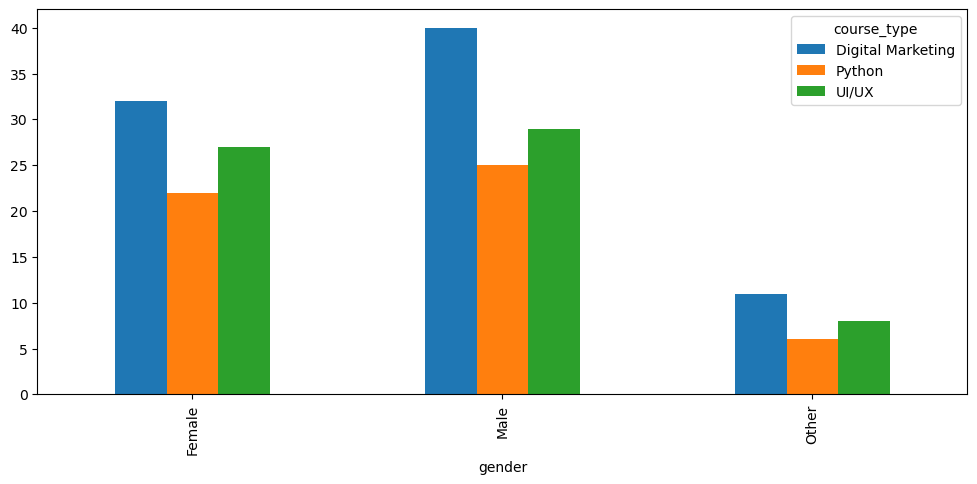

In [78]:
pd.crosstab(index=learning_data['gender'],columns=learning_data['course_type']).plot(kind='bar', figsize=(12, 5))
plt.show()

**Inference:** 
* Across all genders `maximum` learners are enrolled in `Digital Marketing` course and `minimum` for `Python` course.

# **Encoding of categorical variables for machine learning model**

**Ordinal encoding of `gender` and `course type`**

In [79]:
gender_dict = {'Female':0,'Male':1,'Other':2}

In [80]:
learning_data['gender'] = learning_data['gender'].map(gender_dict)

In [81]:
coursetype_dict = {'Digital Marketing':0,'UI/UX':1,'Python':2}

In [82]:
learning_data['course_type'] = learning_data['course_type'].map(coursetype_dict)

**Inference:** 
* We encoded categorical variables gender and course_type to numerical variables using ordinal encoding.

# **Train Test Split**

In [83]:
x = learning_data.drop(columns=['dropout'])
y = learning_data['dropout']

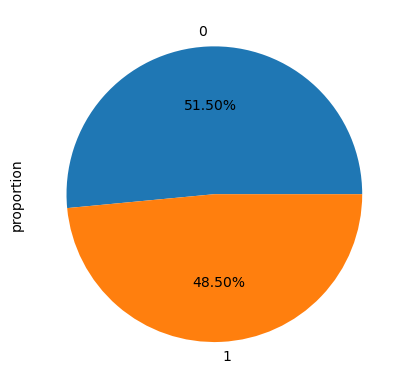

In [84]:
y.value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

**Inference:** 
* Target variable is balanced so we don't have to use SMOTE or random under sampler to balance the data.

In [85]:
# Splitting the data into training and testing sets
# with test size of 20% and random state of 42 to fix the random seed so that when we run the code again we get the same result
# stratify = y is used to ensure that the proportion of each class in the target variable is the same in both training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

**Inference:** 
* Here we have used train test split to split the data into training and testing sets. We have used model selection module of scikit-learn library.


In [86]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (160, 8)
y_train shape: (160,)
x_test shape: (40, 8)
y_test shape: (40,)


# **Predictive Modelling**

In [87]:
# Creating a function to evaluate the model performance
mod = []
acc = []
prec = []
rec = []
f1 = []
ckap = []

def evaluate_model(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]

    print(f'Confusion Matrix : \n {confusion_matrix(ytest, pred_h)}')
    print(f'\n Classification Report : \n {classification_report(ytest, pred_h)}')

    # Plotting the ROC curve
    plt.figure(figsize=(12, 7))
    fpr,tpr,thresh = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr,label=m,color = 'purple')
    plt.plot([0, 1], [0, 1], color='r', ls='--')
    plt.title(f'ROC AUC : {roc_auc_score(ytest,pred_s):.3f}')
    plt.xlabel('False Positive Rate - FPR')
    plt.ylabel('True Positive Rate - TPR')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotting the Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(ytest, pred_s)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(12, 7))
    plt.plot(recall, precision, color='blue')
    plt.title(f'Precision-Recall AUC : {pr_auc:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Saving the model performance metrics in the lists
    ans = input('Do you want to save the result? Y/N : ')
    if ans.lower() == 'y':
        mod.append(str(model))
        acc.append(accuracy_score(ytest, pred_h))
        prec.append(precision_score(ytest, pred_h))
        rec.append(recall_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        ckap.append(cohen_kappa_score(ytest, pred_h))
        global scorecard
        scorecard = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':prec,'Recall':rec,'F1 Score':f1,'Cohen Kappa Score':ckap})
        print('\nResult saved to scorecard')
    else:
        return
    

**Defining Tuning function**

In [88]:
def tuning_parameters(grid,estimator,x,y,score = 'f1'):
    gscv = GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## **`Logistic Regression`**

Confusion Matrix : 
 [[14  7]
 [ 3 16]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.70      0.84      0.76        19

    accuracy                           0.75        40
   macro avg       0.76      0.75      0.75        40
weighted avg       0.76      0.75      0.75        40



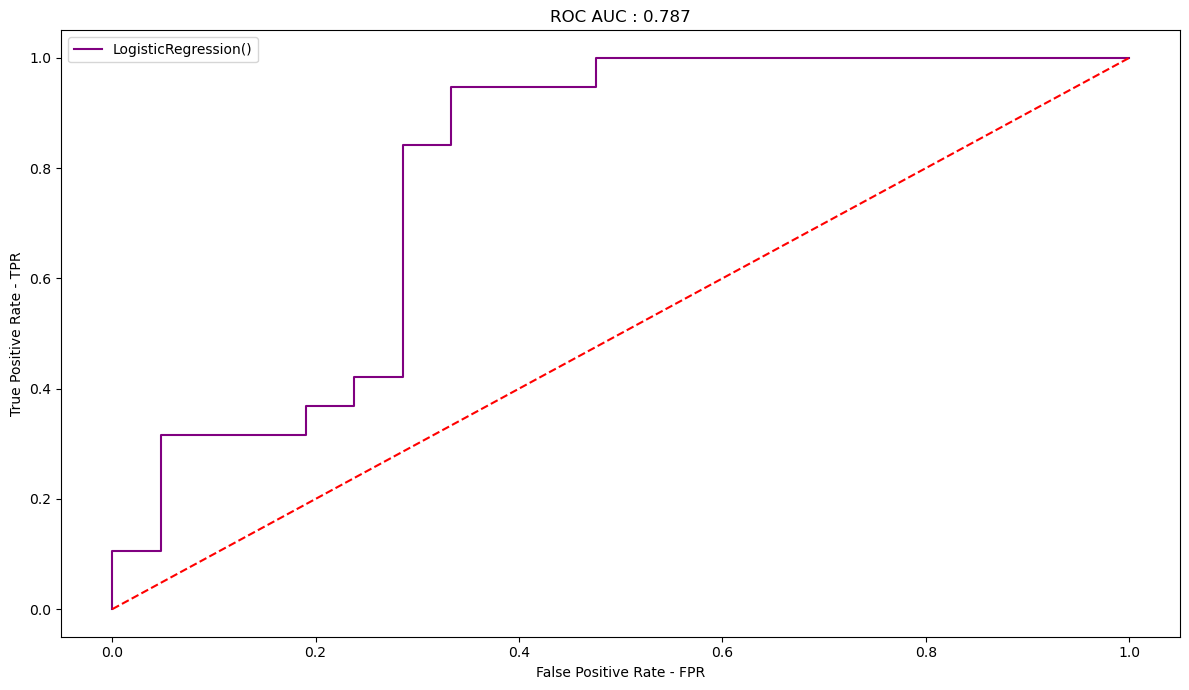

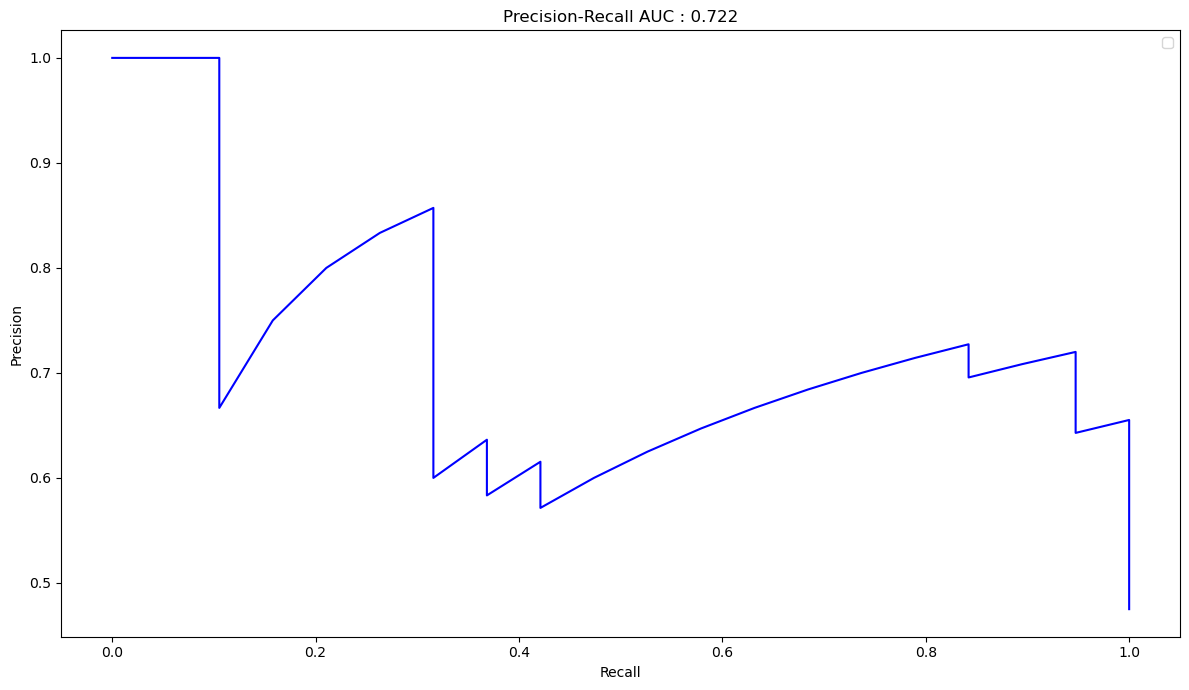


Result saved to scorecard


In [89]:
evaluate_model(LogisticRegression(),x_train,y_train,x_test,y_test)

In [90]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.75,0.696,0.842,0.762,0.504


## **`Decision Tree Classifier`**

Confusion Matrix : 
 [[17  4]
 [ 4 15]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.79      0.79      0.79        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



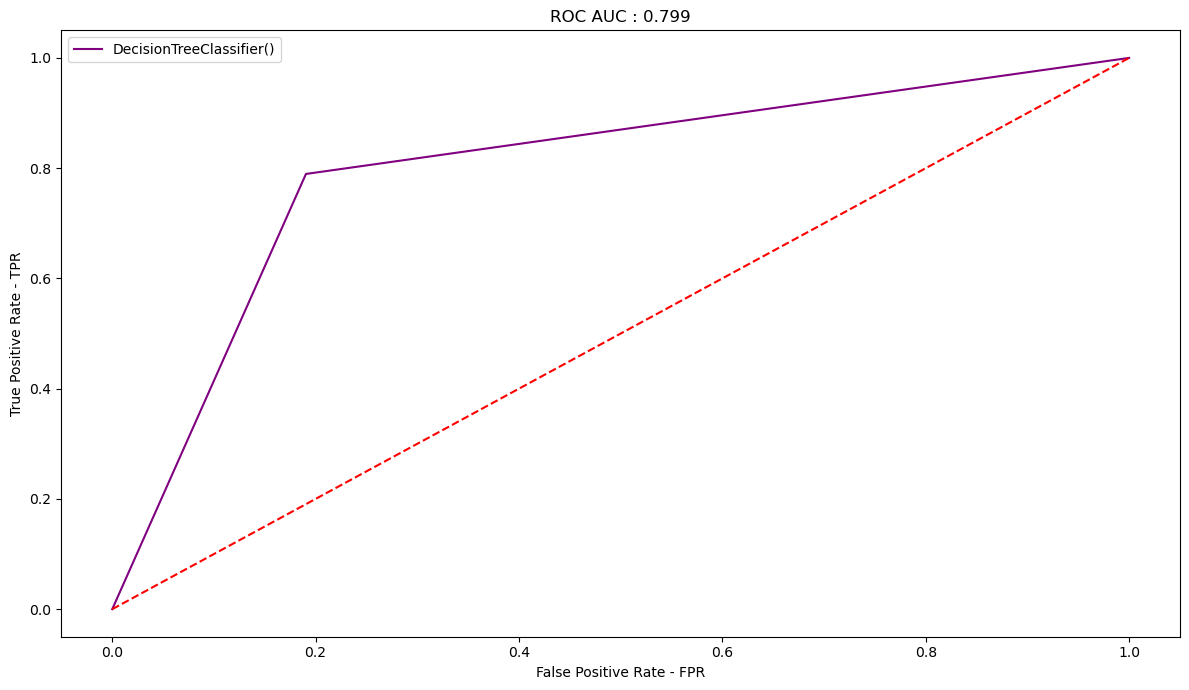

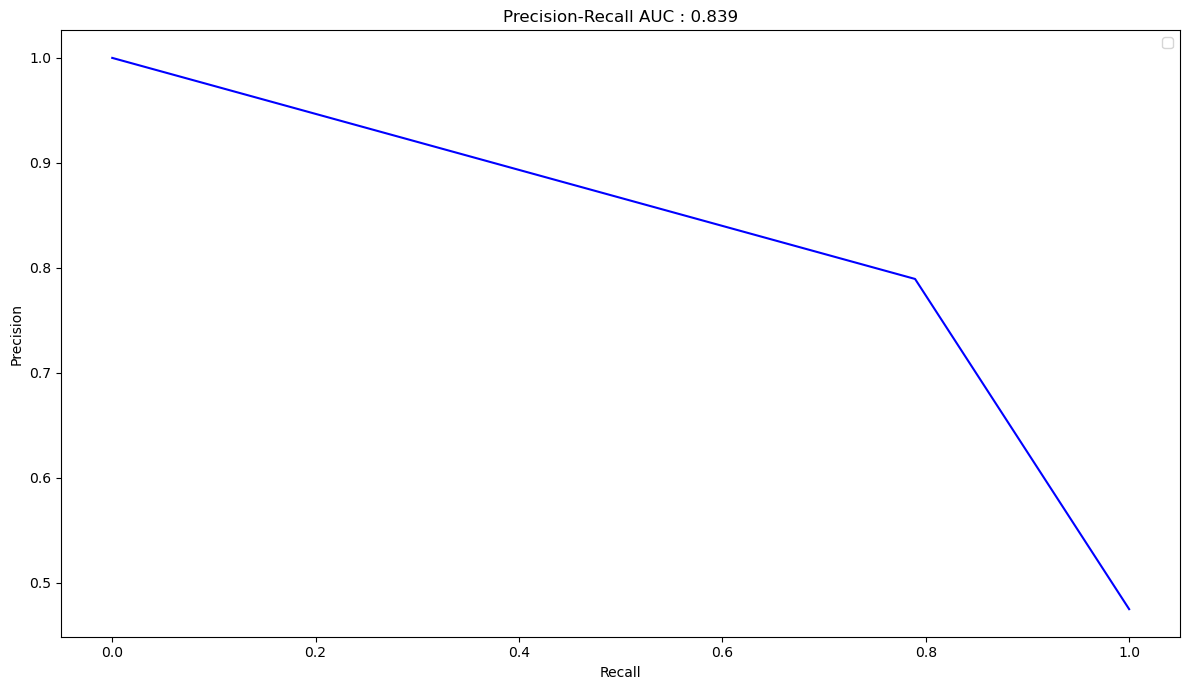


Result saved to scorecard


In [91]:
evaluate_model(DecisionTreeClassifier(),x_train,y_train,x_test,y_test)

In [92]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.75,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.80,0.789,0.789,0.789,0.599


### **With Tuning using gridsearchcv**

In [93]:
best_dt = tuning_parameters({'max_depth':[2,5,6,9],'min_samples_split':[2,3,5,6,7],'max_features':[2,4,5],
                             'max_leaf_nodes':[3,4,6,8],'min_samples_leaf':[2,3,6,7]},
                             estimator = DecisionTreeClassifier(),x = x_train,y = y_train)
best_dt

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


{'max_depth': 9,
 'max_features': 5,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Confusion Matrix : 
 [[15  6]
 [ 0 19]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.76      1.00      0.86        19

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40



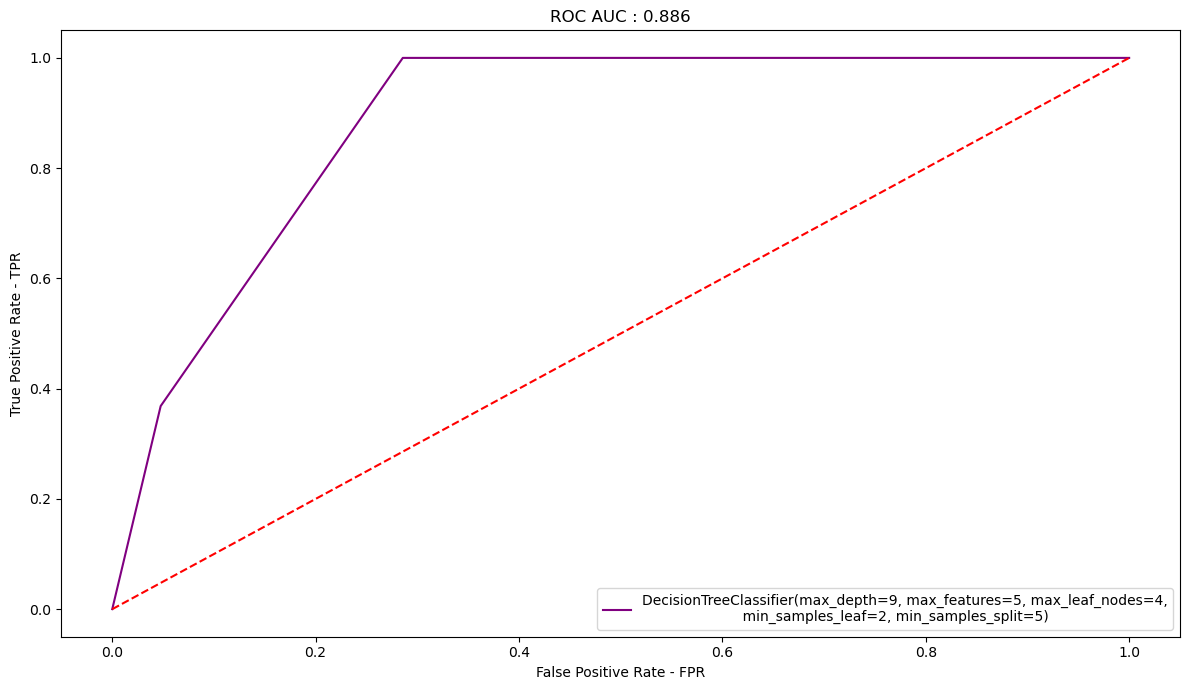

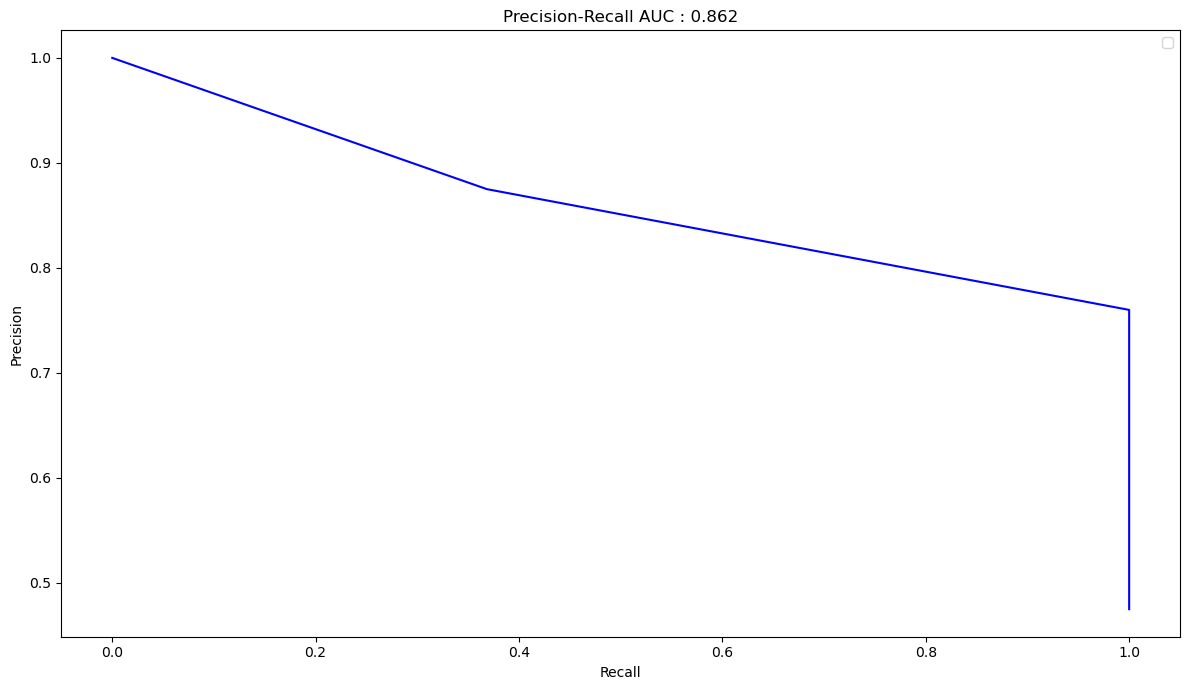


Result saved to scorecard


In [94]:
evaluate_model(DecisionTreeClassifier(**best_dt),x_train,y_train,x_test,y_test)

In [95]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.75,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.80,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.85,0.760,1.000,0.864,0.704


## **`Bagging Classifier`**

Confusion Matrix : 
 [[17  4]
 [ 3 16]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



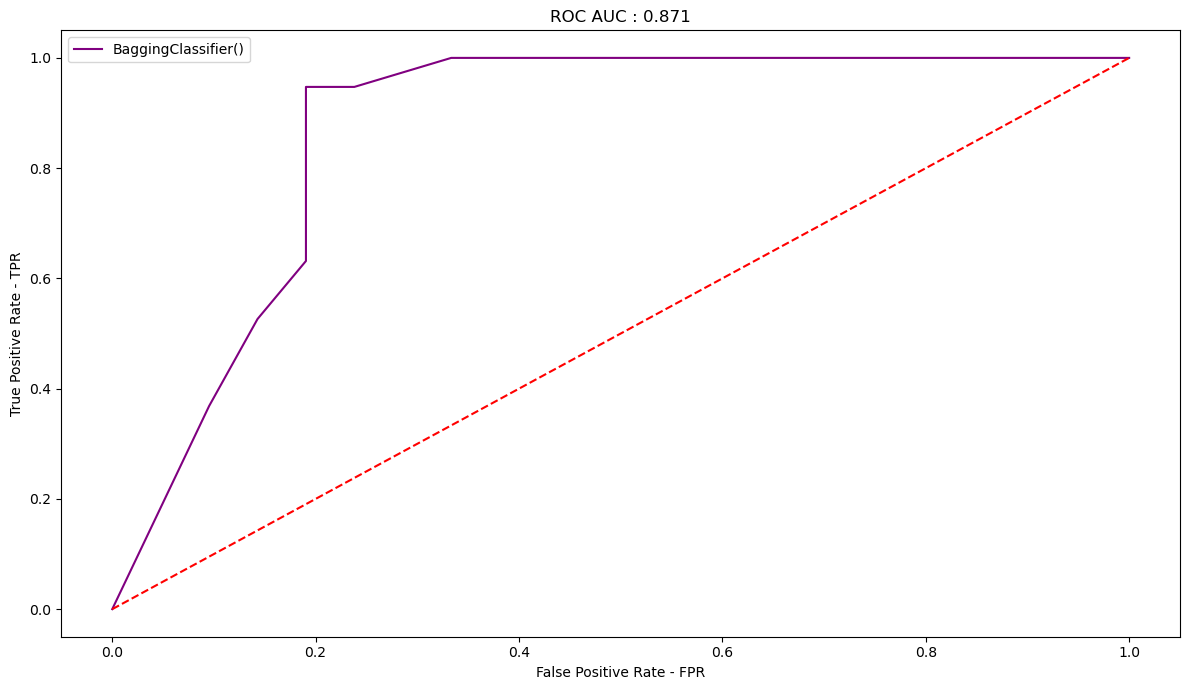

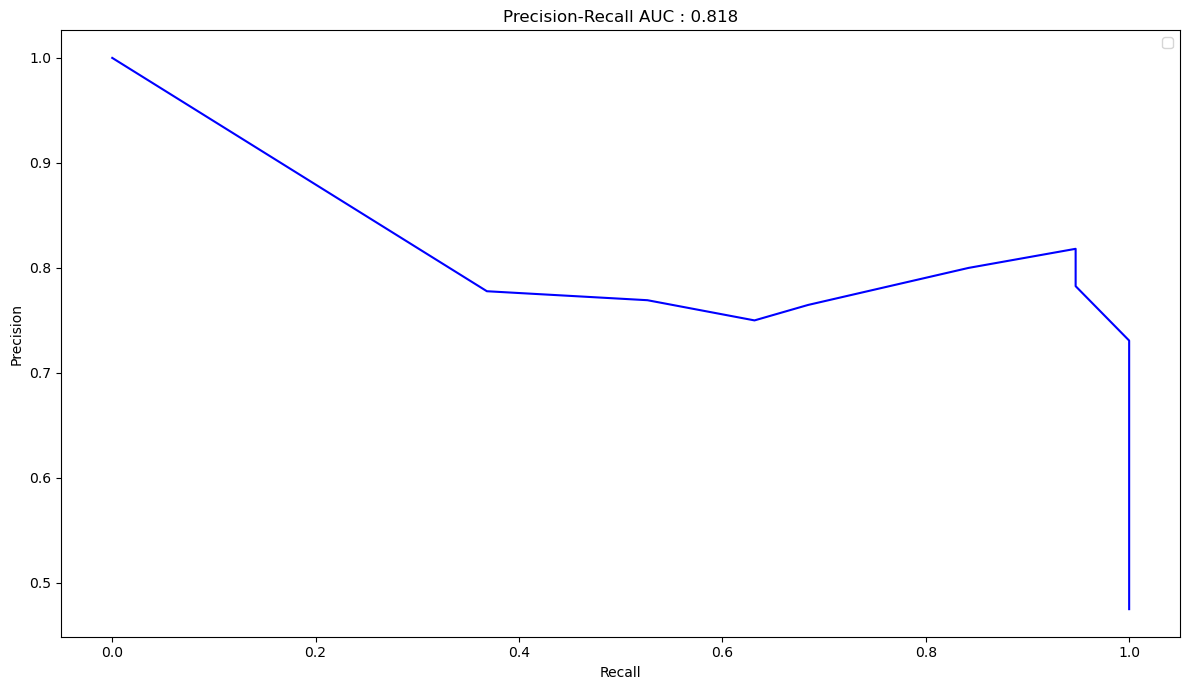


Result saved to scorecard


In [96]:
evaluate_model(BaggingClassifier(),x_train,y_train,x_test,y_test)

In [97]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650


## **With Tuning using defined function**

In [98]:
best_bg = tuning_parameters({'n_estimators':[100,130,170,200],'max_samples':[4,7,8],'max_features':[3,5,6,7]},
                             estimator=BaggingClassifier(),x=x_train,y=y_train)
best_bg

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_features': 6, 'max_samples': 8, 'n_estimators': 170}

Confusion Matrix : 
 [[16  5]
 [ 5 14]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.74      0.74      0.74        19

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



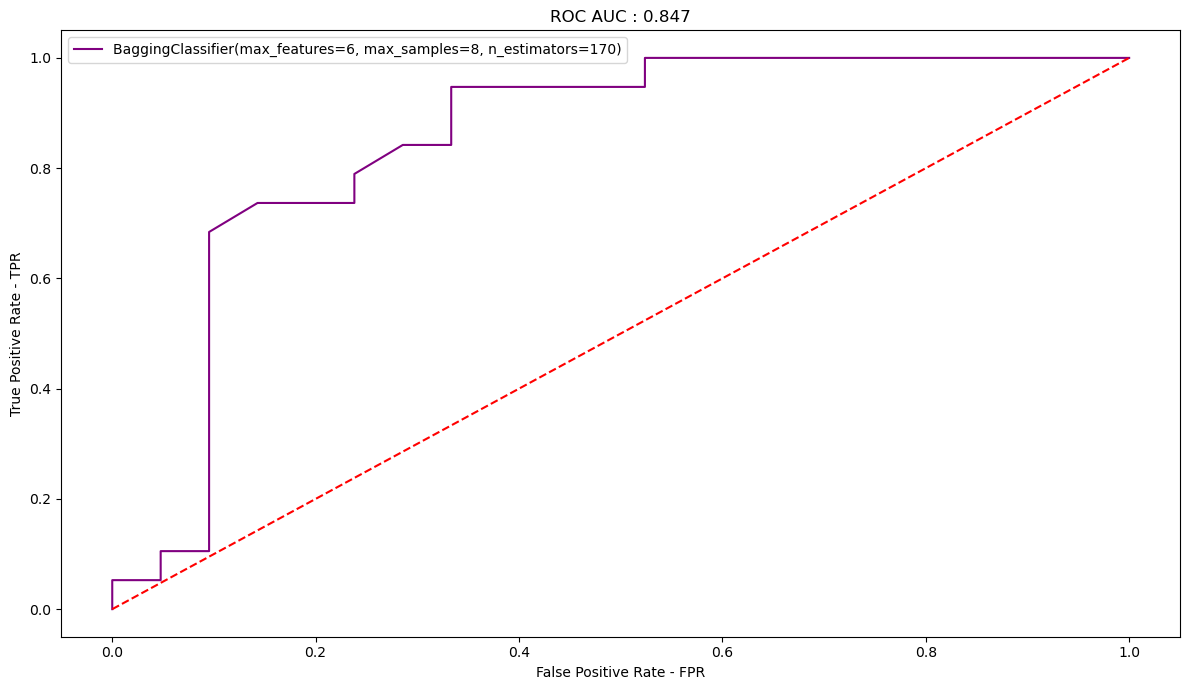

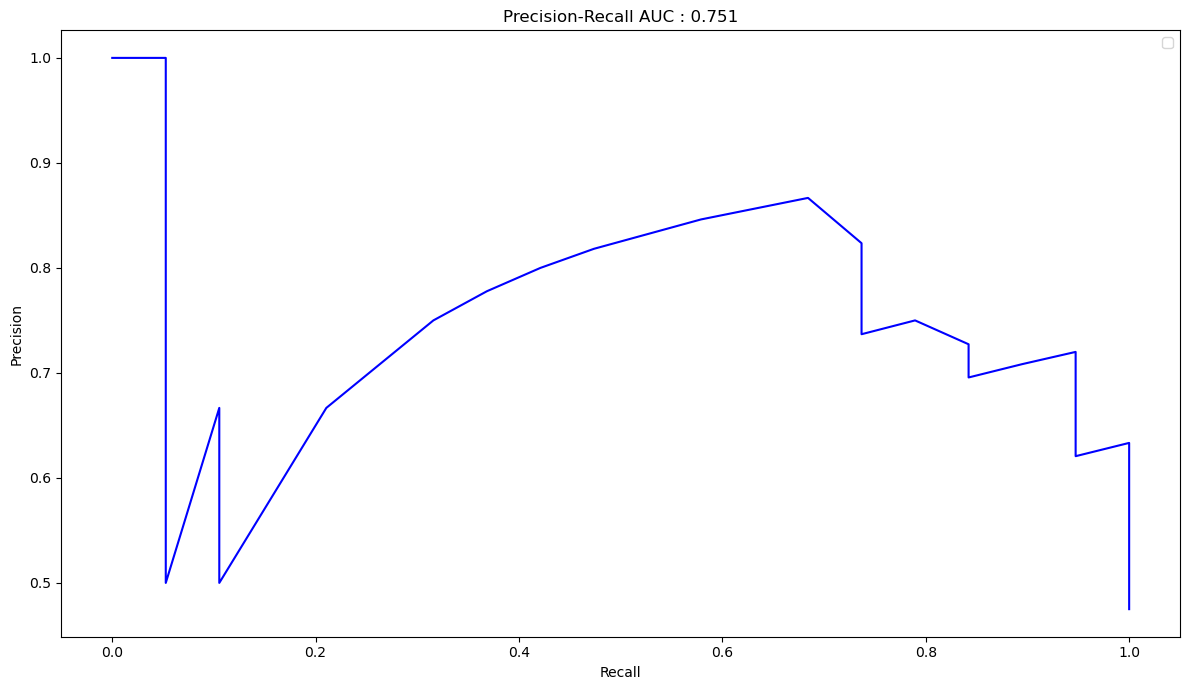


Result saved to scorecard


In [99]:
evaluate_model(BaggingClassifier(**best_bg),x_train,y_train,x_test,y_test)

In [100]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499


## **`Random Forest Classifier`**

Confusion Matrix : 
 [[17  4]
 [ 1 18]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.82      0.95      0.88        19

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



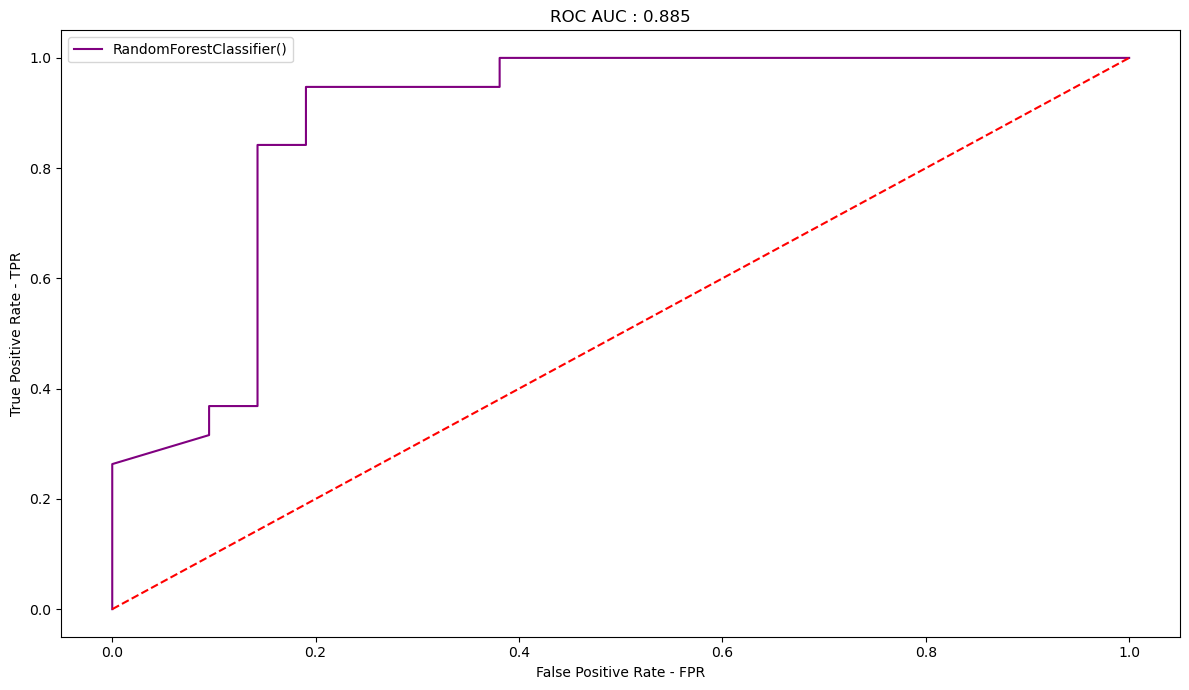

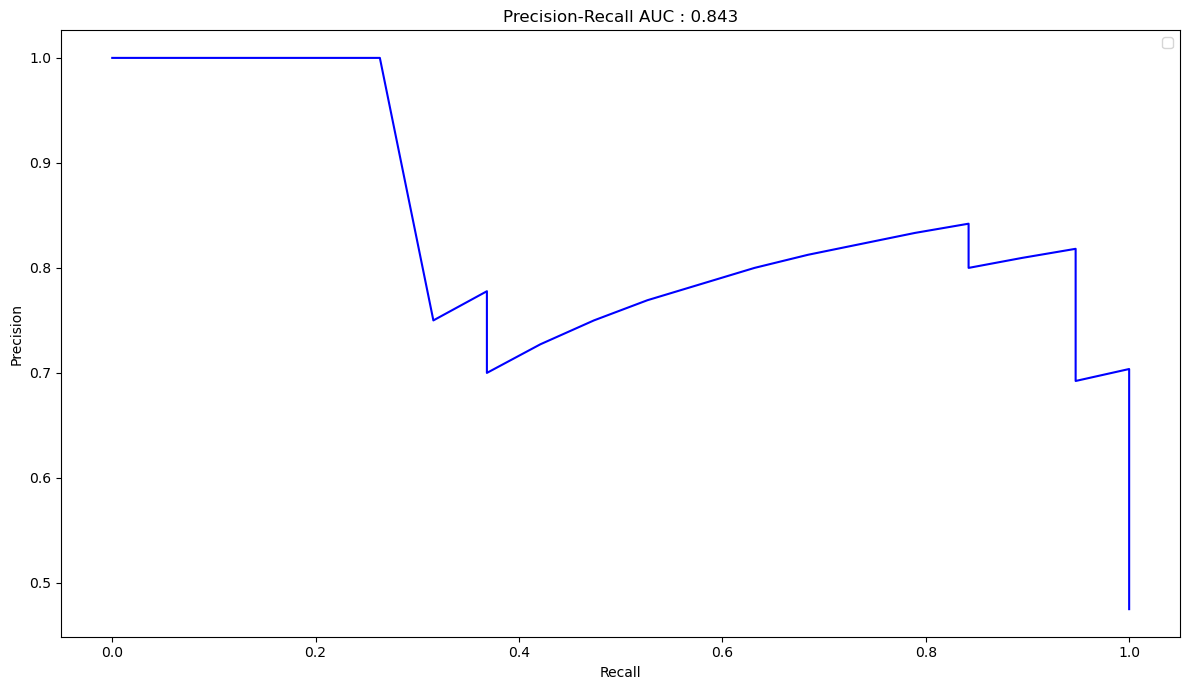


Result saved to scorecard


In [101]:
evaluate_model(RandomForestClassifier(),x_train,y_train,x_test,y_test)

In [102]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751


## **With Tuning using defined function**

In [108]:
best_rf = tuning_parameters({'n_estimators':[100,170,180],'max_features':[2,3,6],
                             'max_depth':[3,5,8]},
                             estimator=RandomForestClassifier(),x=x_train,y=y_train)
best_rf

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 3, 'max_features': 3, 'n_estimators': 180}

Confusion Matrix : 
 [[16  5]
 [ 1 18]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.78      0.95      0.86        19

    accuracy                           0.85        40
   macro avg       0.86      0.85      0.85        40
weighted avg       0.87      0.85      0.85        40



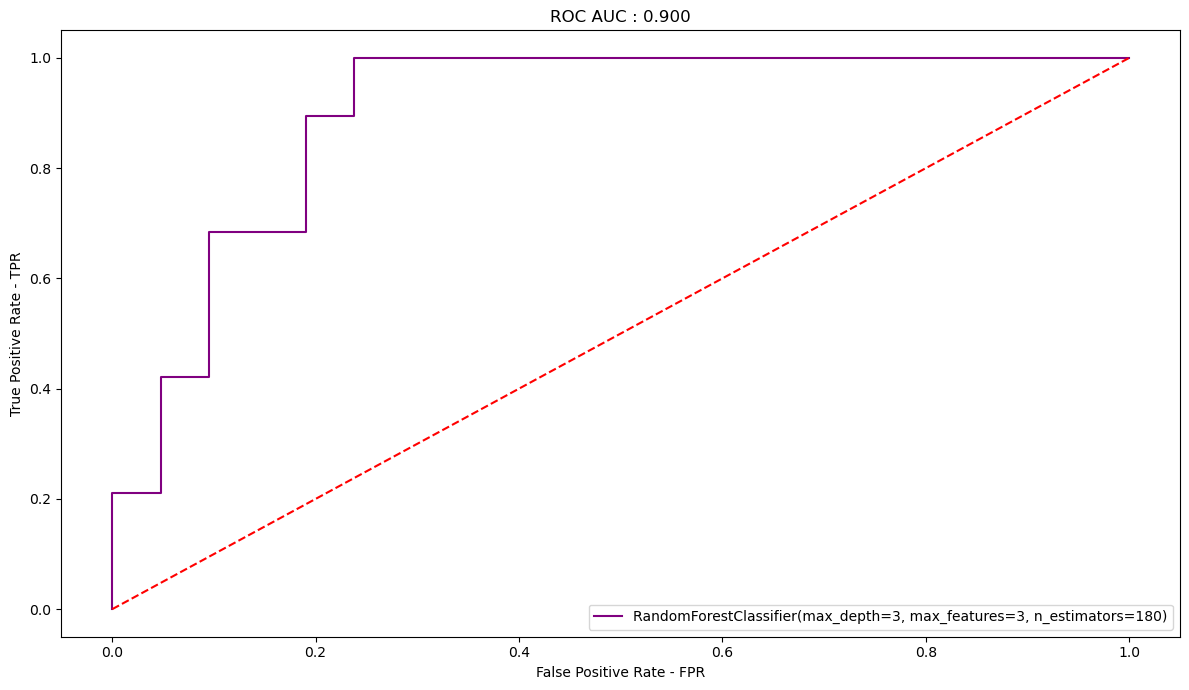

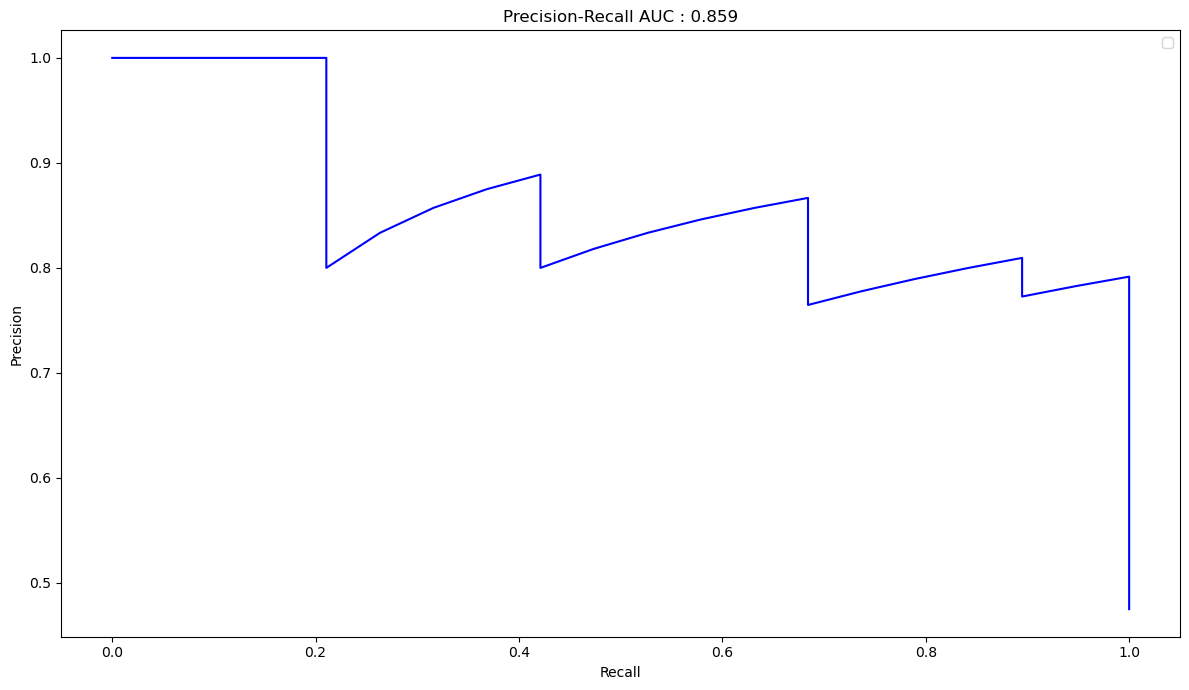


Result saved to scorecard


In [109]:
evaluate_model(RandomForestClassifier(**best_rf),x_train,y_train,x_test,y_test)

In [110]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702


## **`Ada Boost Classifier`**

Confusion Matrix : 
 [[14  7]
 [ 2 17]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.71      0.89      0.79        19

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.77        40
weighted avg       0.80      0.78      0.77        40



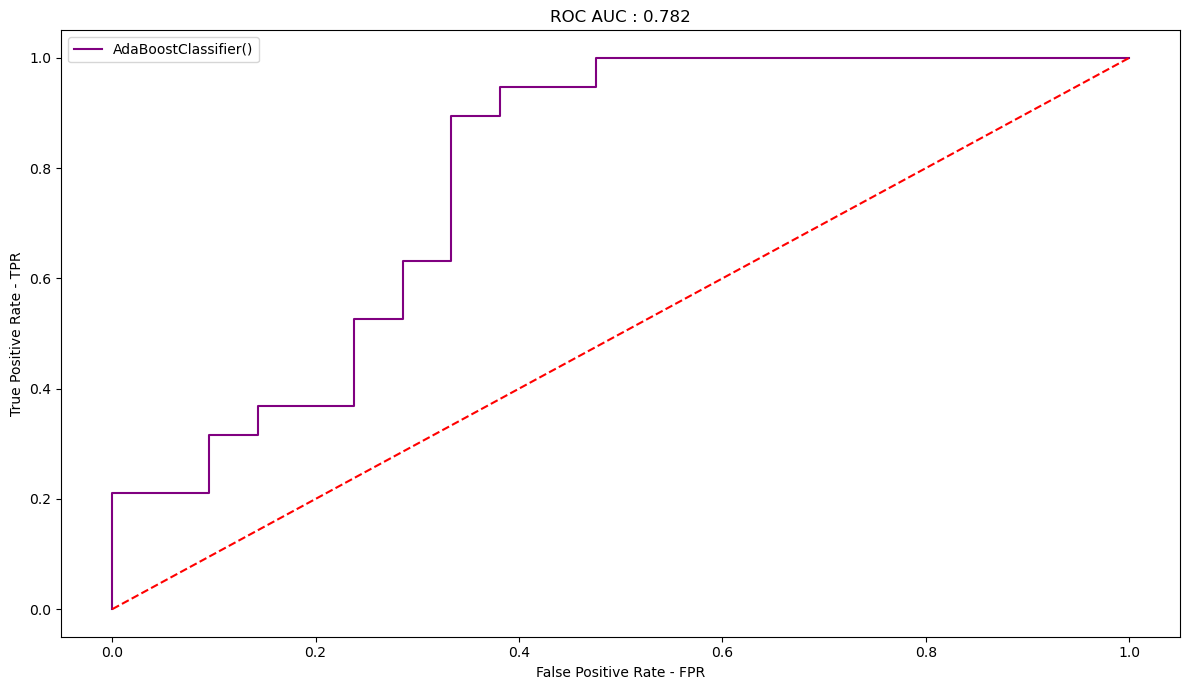

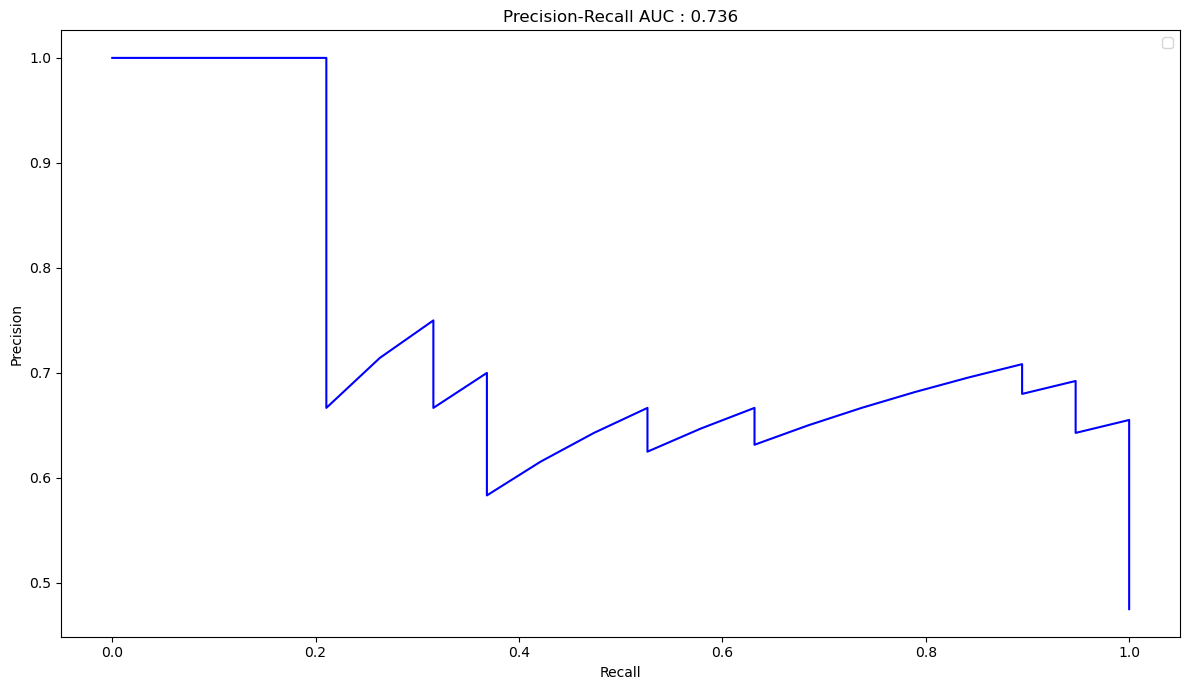


Result saved to scorecard


In [111]:
evaluate_model(AdaBoostClassifier(),x_train,y_train,x_test,y_test)

In [107]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751


## **With Tuning using defined function**

In [115]:
best_ada = tuning_parameters({'n_estimators':[110,140,170,230,250],'learning_rate':[0.2,0.3,0.4,0.7,0.8,0.9]},
                             estimator=AdaBoostClassifier(),x=x_train,y=y_train)
best_ada

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'learning_rate': 0.3, 'n_estimators': 250}

Confusion Matrix : 
 [[17  4]
 [ 2 17]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



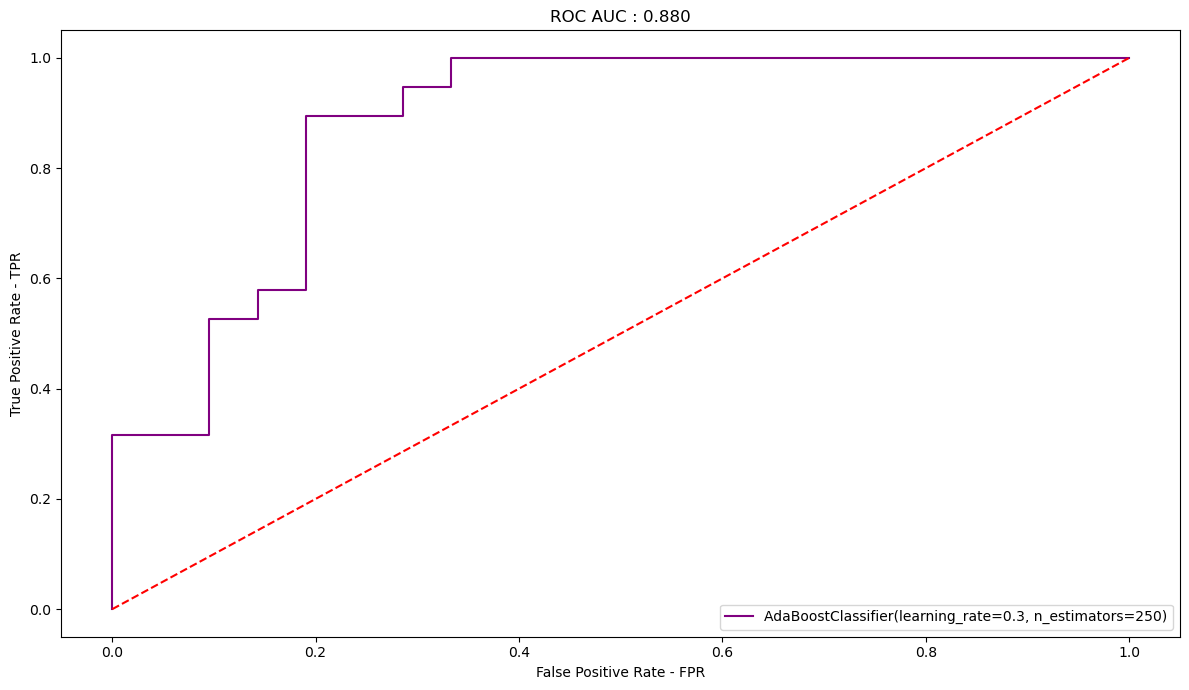

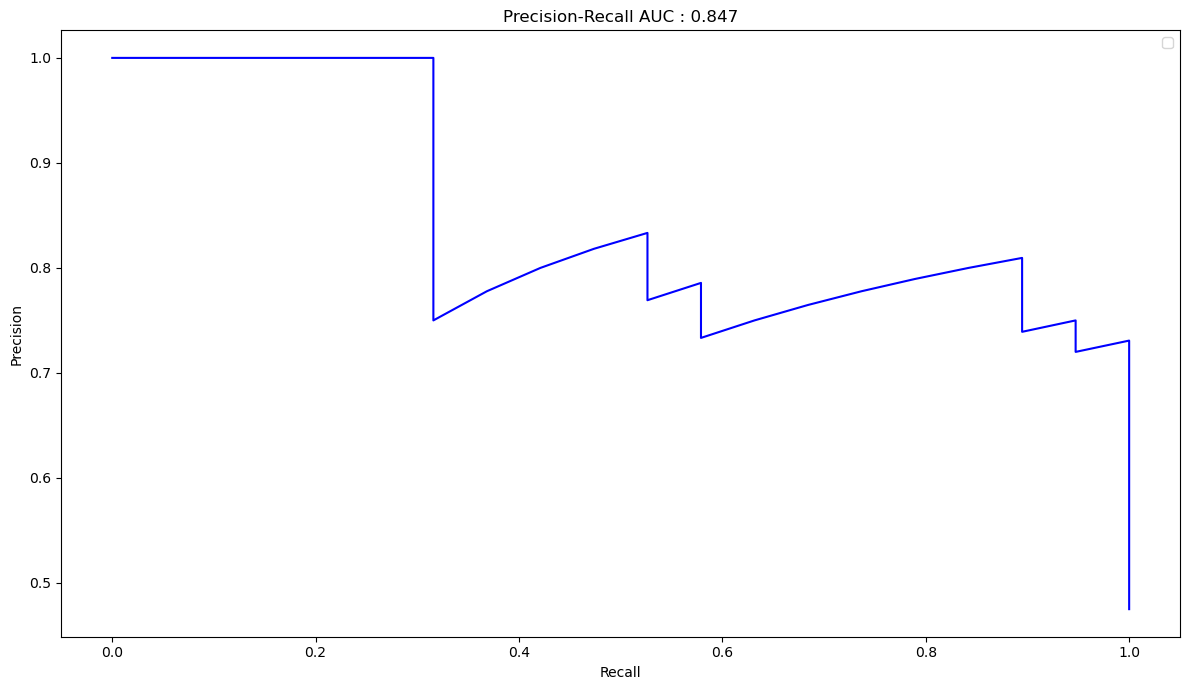


Result saved to scorecard


In [116]:
evaluate_model(AdaBoostClassifier(**best_ada),x_train,y_train,x_test,y_test)

In [117]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702
7,AdaBoostClassifier(),0.775,0.708,0.895,0.791,0.554
8,"AdaBoostClassifier(learning_rate=0.3, n_estima...",0.850,0.810,0.895,0.850,0.701


## **`Gradient Boost Classifier`**

Confusion Matrix : 
 [[17  4]
 [ 3 16]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



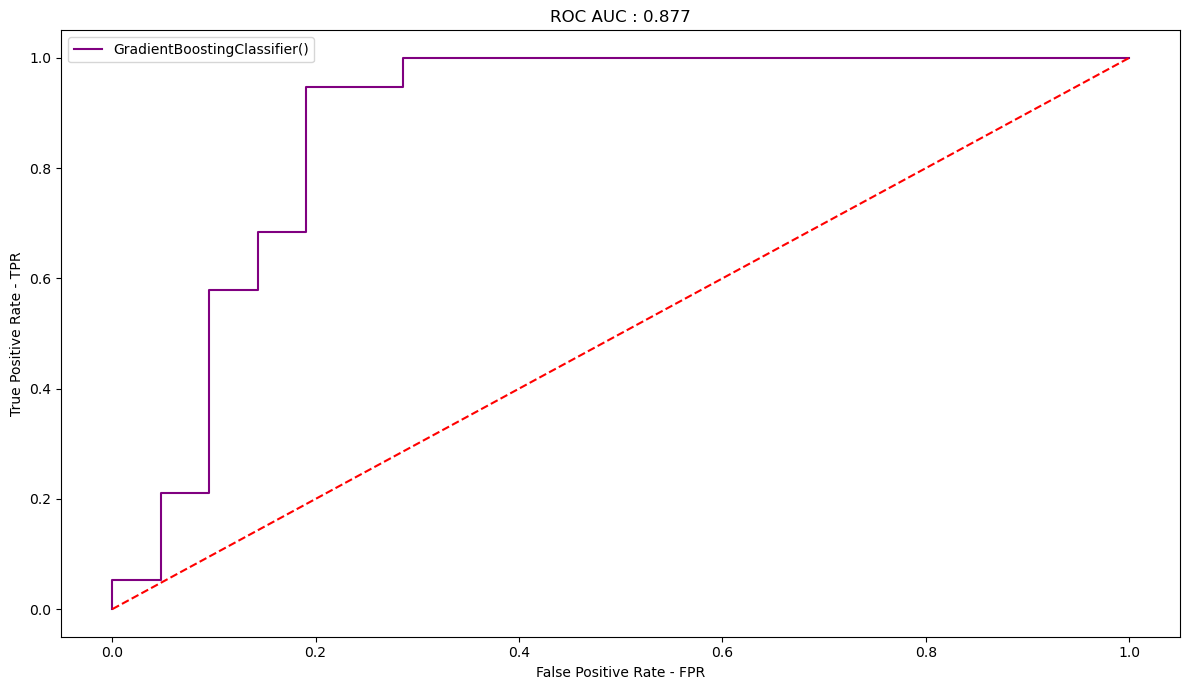

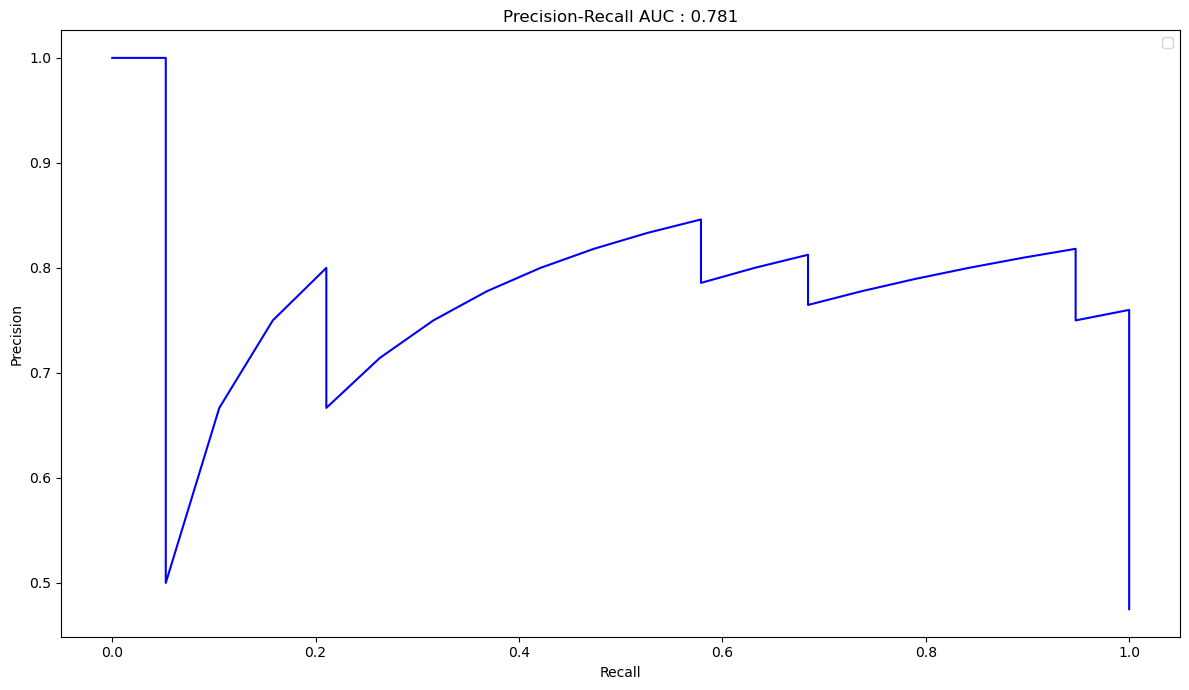


Result saved to scorecard


In [118]:
evaluate_model(GradientBoostingClassifier(),x_train,y_train,x_test,y_test)

In [119]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702
7,AdaBoostClassifier(),0.775,0.708,0.895,0.791,0.554
8,"AdaBoostClassifier(learning_rate=0.3, n_estima...",0.850,0.810,0.895,0.850,0.701
9,GradientBoostingClassifier(),0.825,0.800,0.842,0.821,0.650


## **`XG Boost Classifier`**

Confusion Matrix : 
 [[17  4]
 [ 3 16]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



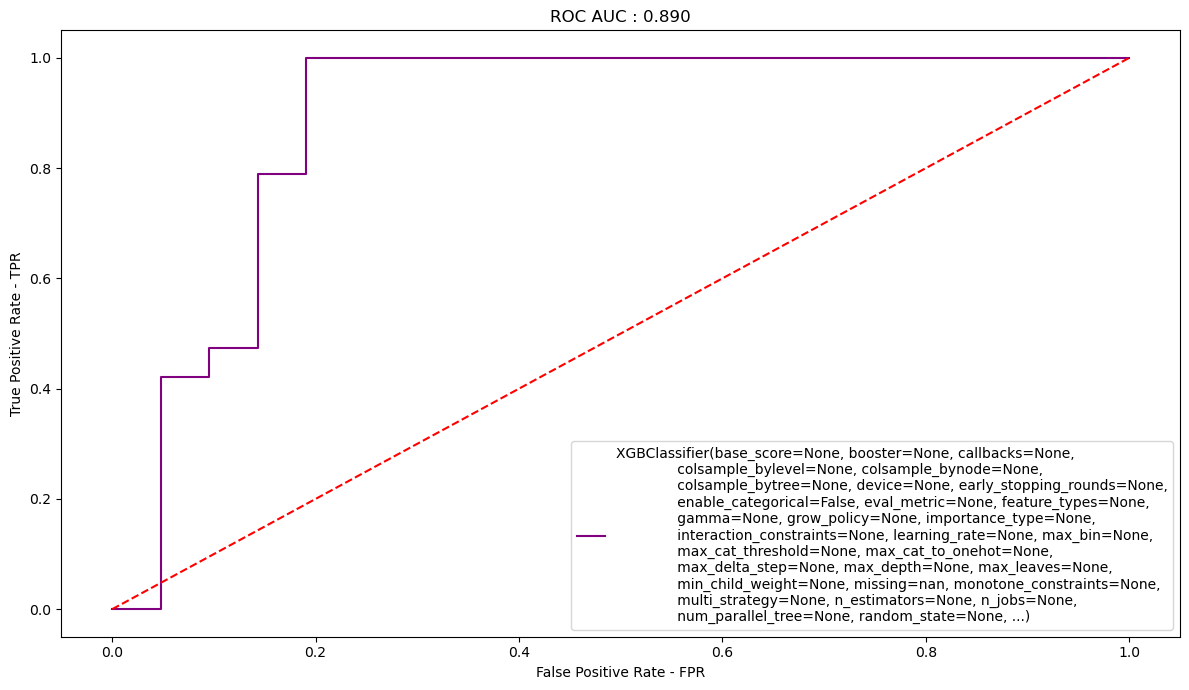

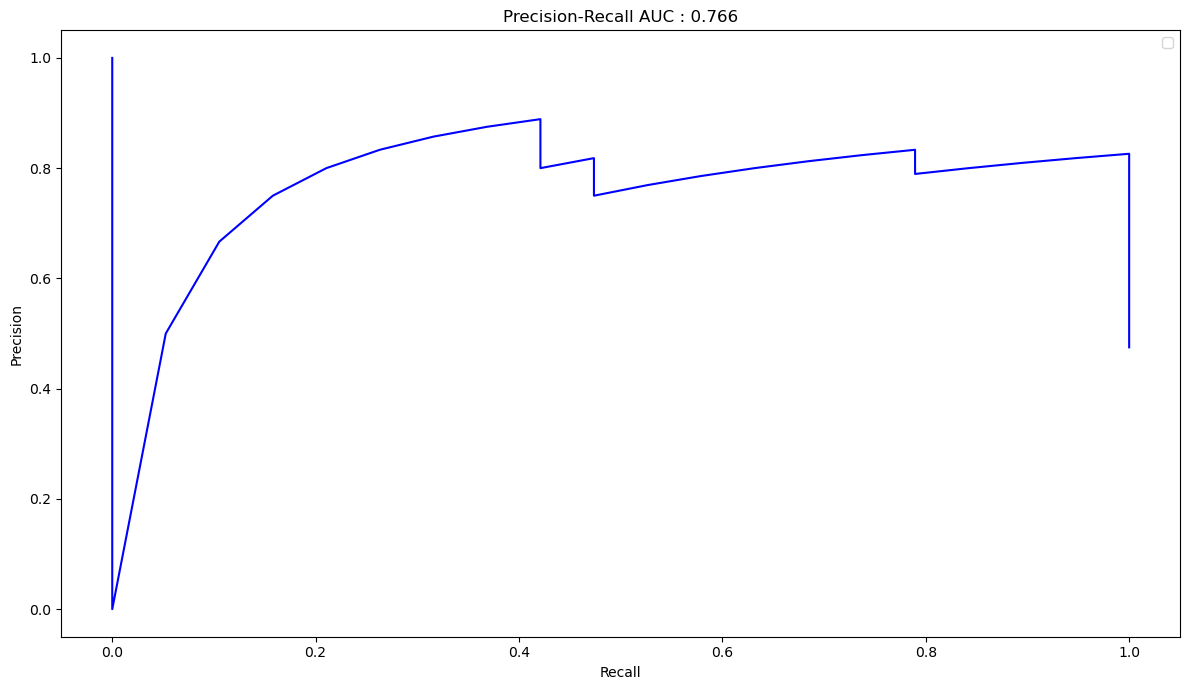


Result saved to scorecard


In [120]:
evaluate_model(XGBClassifier(),x_train,y_train,x_test,y_test)

In [121]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702
7,AdaBoostClassifier(),0.775,0.708,0.895,0.791,0.554
8,"AdaBoostClassifier(learning_rate=0.3, n_estima...",0.850,0.810,0.895,0.850,0.701
9,GradientBoostingClassifier(),0.825,0.800,0.842,0.821,0.650


## **With Tuning using defined function**

In [ ]:
XGBClassifier()

In [132]:
best_xg = tuning_parameters({'n_estimators':[30,40,50,80],'learning_rate':[0.05,0.07,0.2],'max_depth':[4,9],
                             'min_child_weight':[4,5],'gamma':[5,7]},estimator=XGBClassifier(),x=x_train,y=y_train)
best_xg

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'gamma': 5,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 30}

Confusion Matrix : 
 [[15  6]
 [ 0 19]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.76      1.00      0.86        19

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40



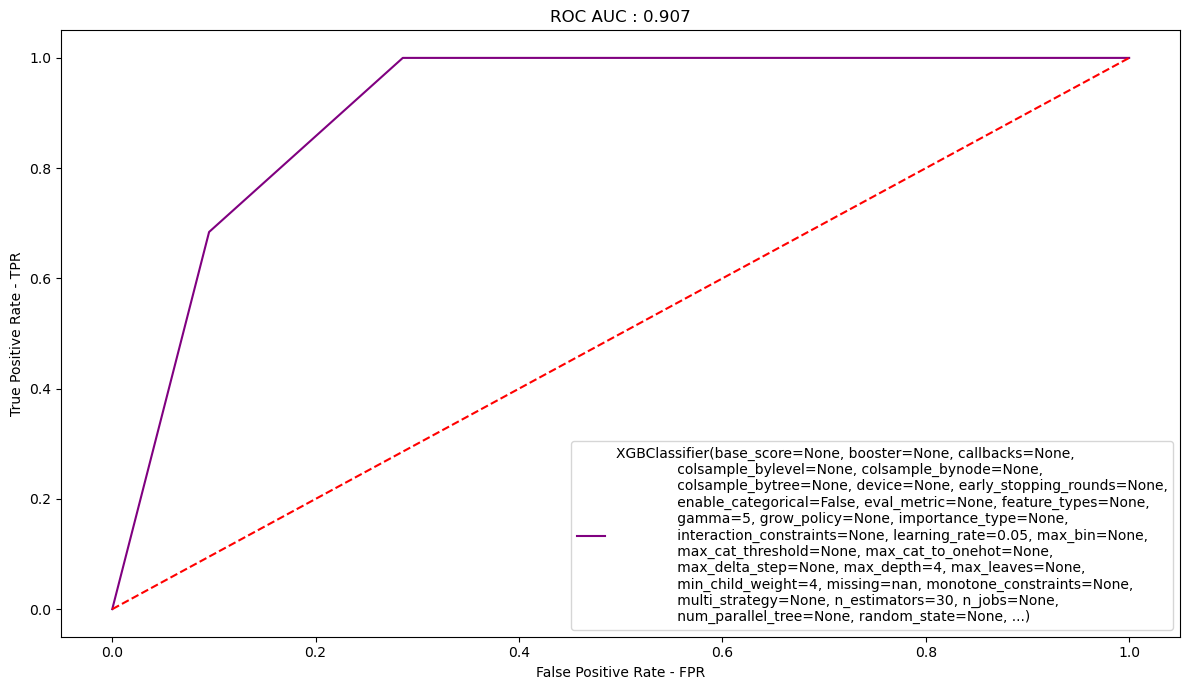

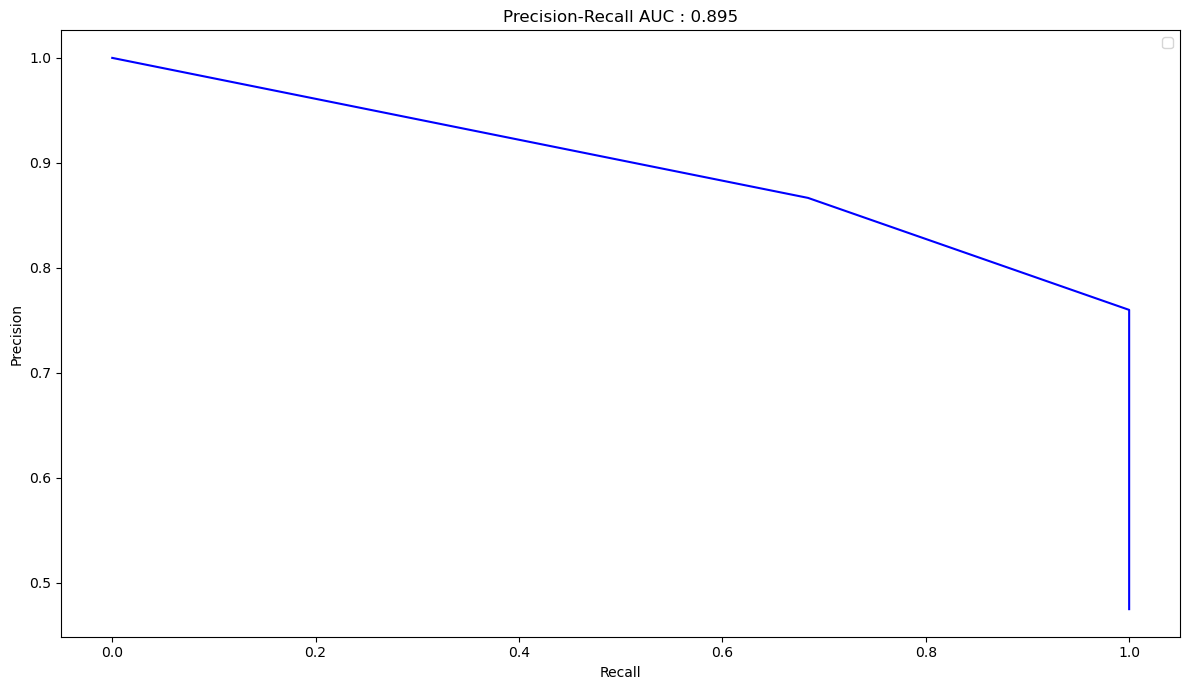


Result saved to scorecard


In [133]:
evaluate_model(XGBClassifier(**best_xg),x_train,y_train,x_test,y_test)

In [134]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702
7,AdaBoostClassifier(),0.775,0.708,0.895,0.791,0.554
8,"AdaBoostClassifier(learning_rate=0.3, n_estima...",0.850,0.810,0.895,0.850,0.701
9,GradientBoostingClassifier(),0.825,0.800,0.842,0.821,0.650


# **Final Model**

In [143]:
final_model = XGBClassifier(**best_rf)
final_model.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_features=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, ...)

#### **Inference:** For final model we have used xgboost with tuning hyperparameters of random forest.

Confusion Matrix : 
 [[18  3]
 [ 2 17]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.85      0.89      0.87        19

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



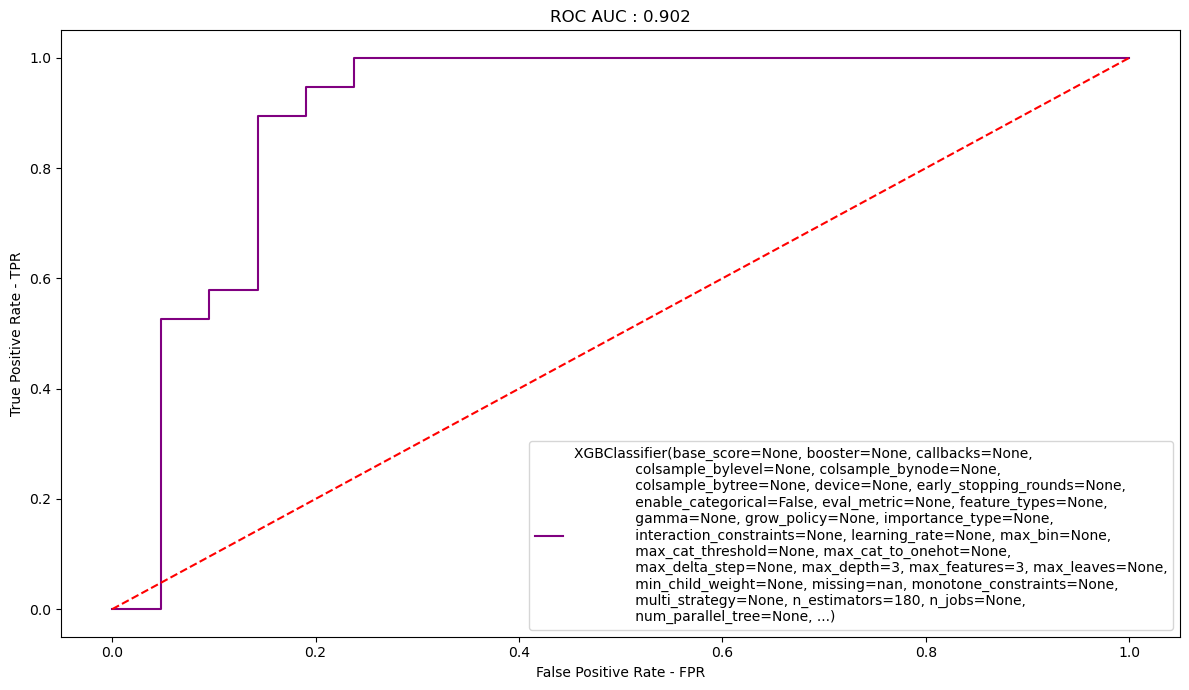

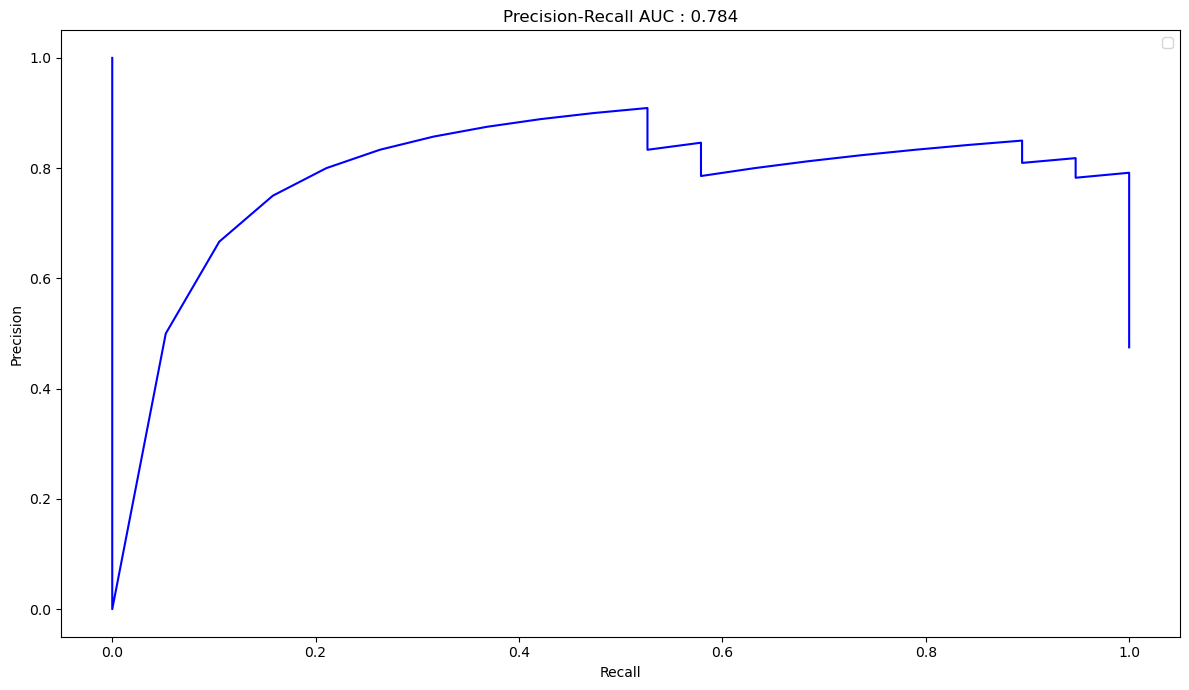


Result saved to scorecard


In [144]:
evaluate_model(final_model,x_train,y_train,x_test,y_test)

In [145]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.750,0.696,0.842,0.762,0.504
1,DecisionTreeClassifier(),0.800,0.789,0.789,0.789,0.599
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.850,0.760,1.000,0.864,0.704
3,BaggingClassifier(),0.825,0.800,0.842,0.821,0.650
4,"BaggingClassifier(max_features=6, max_samples=...",0.750,0.737,0.737,0.737,0.499
5,RandomForestClassifier(),0.875,0.818,0.947,0.878,0.751
6,"RandomForestClassifier(max_depth=3, max_featur...",0.850,0.783,0.947,0.857,0.702
7,AdaBoostClassifier(),0.775,0.708,0.895,0.791,0.554
8,"AdaBoostClassifier(learning_rate=0.3, n_estima...",0.850,0.810,0.895,0.850,0.701
9,GradientBoostingClassifier(),0.825,0.800,0.842,0.821,0.650


# **KFold Cross Validation**

In [157]:
model = final_model
kfold_validation = KFold(n_splits=10,shuffle=True,random_state=42)
results = cross_val_score(model,x_train,y_train,cv=kfold_validation,scoring='accuracy')

# Cross validation scores
print(f'Cross Validation Scores : {results}')
print(f'Cross Validation Mean : {results.mean():.3f}')
print(f'Cross Validation Standard Deviation : {results.std():.3f}')

Cross Validation Scores : [0.875  0.875  0.875  0.8125 0.75   0.8125 0.6875 0.8125 0.875  0.8125]
Cross Validation Mean : 0.819
Cross Validation Standard Deviation : 0.059


**Inference:**
From comparing `scores of cross validation` with the `scores of final model` we can see that model is `not overfitting`.

# **Feature Importance**

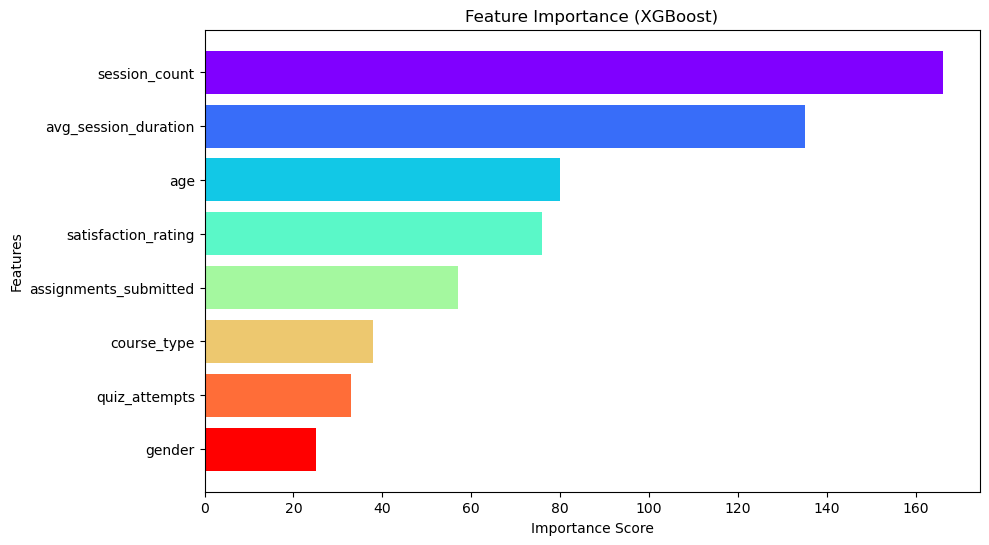

In [158]:
importance = final_model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sorted_importance]
scores = [x[1] for x in sorted_importance]

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(features)))
plt.barh(features, scores, color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis() 
plt.show()

#### **Inference:**
* As we can see the `most imortant` feature is `session_count` followed by `avg_session_duration, age and satisfaction_rating`.

* `Least important` feature is `gender`